In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ["hcho-reading","location","current-date","next-date"]

In [3]:
# load datasets as dataframes
col_mat_nuw_df = pd.read_csv('col_mat_nuw_output.csv',names=columns, na_values=["?"])
col_mat_nuw_df.head()

,hcho-reading,location,current-date,next-date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [4]:
kan_df = pd.read_csv('kan_output.csv',names=columns, na_values=["?"])
kan_df.head()

,hcho-reading,location,current-date,next-date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06


In [5]:
mon_kur_jaf_df = pd.read_csv('mon_kur_jaf_output.csv',names=columns,na_values=["?"])
mon_kur_jaf_df.head()

,hcho-reading,location,current-date,next-date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06


In [6]:
# checking data shapes
print("col_mat_nuw_df Rows and Columns:",col_mat_nuw_df.shape)
print("kan_df Rows and Columns:",kan_df.shape)
print("mon_kur_jaf_df Rows and Columns:",mon_kur_jaf_df.shape)

col_mat_nuw_df Rows and Columns: (5478, 4)
kan_df Rows and Columns: (1826, 4)
mon_kur_jaf_df Rows and Columns: (5478, 4)


In [7]:
# checking datatypes
print(col_mat_nuw_df.dtypes,"\n")
print(kan_df.dtypes,"\n")
print(mon_kur_jaf_df.dtypes)

hcho-reading    float64
location         object
current-date     object
next-date        object
dtype: object 

hcho-reading    float64
location         object
current-date     object
next-date        object
dtype: object 

hcho-reading    float64
location         object
current-date     object
next-date        object
dtype: object


In [8]:
# combine all dataframes
cities_df = pd.concat([col_mat_nuw_df,kan_df,mon_kur_jaf_df])

In [9]:
cities_df.head()

,hcho-reading,location,current-date,next-date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [10]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12782 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hcho-reading  7918 non-null   float64
 1   location      12782 non-null  object 
 2   current-date  12782 non-null  object 
 3   next-date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 499.3+ KB


In [11]:
# check NaN values
cities_df.isnull().sum()

hcho-reading    4864
location           0
current-date       0
next-date          0
dtype: int64

In [12]:
# nan values replace from mean of each column
mean = cities_df['hcho-reading'].mean()
cities_df['hcho-reading'].fillna(mean, inplace=True)

In [13]:
# check NaN values again
cities_df.isnull().sum()

hcho-reading    0
location        0
current-date    0
next-date       0
dtype: int64

In [14]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12782 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hcho-reading  12782 non-null  float64
 1   location      12782 non-null  object 
 2   current-date  12782 non-null  object 
 3   next-date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 499.3+ KB


In [15]:
# check duplicate rows
duplicate_rows=cities_df.duplicated().sum()
duplicate_rows

0

In [16]:
# check min value
min=cities_df['hcho-reading'].min()
print("Min:",min)

max=cities_df['hcho-reading'].max()
# check max value
print("Max:",max)

Min: -0.0003524730243572
Max: 0.0008997101837438


In [17]:
# check number of negative values
negative_values=(cities_df['hcho-reading'] < 0).sum()
negative_values

563

In [18]:
# covert negative values to NaN values
cities_df.loc[cities_df['hcho-reading'] < 0, 'hcho-reading'] = pd.NA
print("Negative hcho-reading values converted into NaN values")

Negative hcho-reading values converted into NaN values


In [19]:
# check NaN values
cities_df.isnull().sum()

hcho-reading    563
location          0
current-date      0
next-date         0
dtype: int64

In [20]:
# NaN values replace from mean of each column
city_means = cities_df.groupby('location')['hcho-reading'].transform('mean')
cities_df['hcho-reading'].fillna(city_means, inplace=True)

In [21]:
# check NaN values again
cities_df.isnull().sum()

hcho-reading    0
location        0
current-date    0
next-date       0
dtype: int64

In [22]:
# 'Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper’
# 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper'
# ‘Kandy Proper'



# check unique values in each column
for column in cities_df:
    print(column)
    print(cities_df[column].unique())
    print('\n')

hcho-reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


current-date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


next-date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']




In [23]:
# 'mean', 'median', 'std' for each city
each_city_stats = cities_df.groupby('location')['hcho-reading'].agg(['mean', 'median', 'std'])
print(each_city_stats)

                         mean    median       std
location                                         
Bibile, Monaragala   0.000132  0.000119  0.000062
Colombo Proper       0.000154  0.000119  0.000080
Deniyaya, Matara     0.000114  0.000119  0.000060
Jaffna Proper        0.000116  0.000119  0.000063
Kandy Proper         0.000122  0.000119  0.000055
Kurunegala Proper    0.000135  0.000119  0.000064
Nuwara Eliya Proper  0.000115  0.000119  0.000043


In [24]:
# 'mean', 'median', 'std' for whole dataset
whole_stats = cities_df['hcho-reading'].agg(['mean', 'median', 'std'])
print(whole_stats)

mean      0.000127
median    0.000119
std       0.000063
Name: hcho-reading, dtype: float64


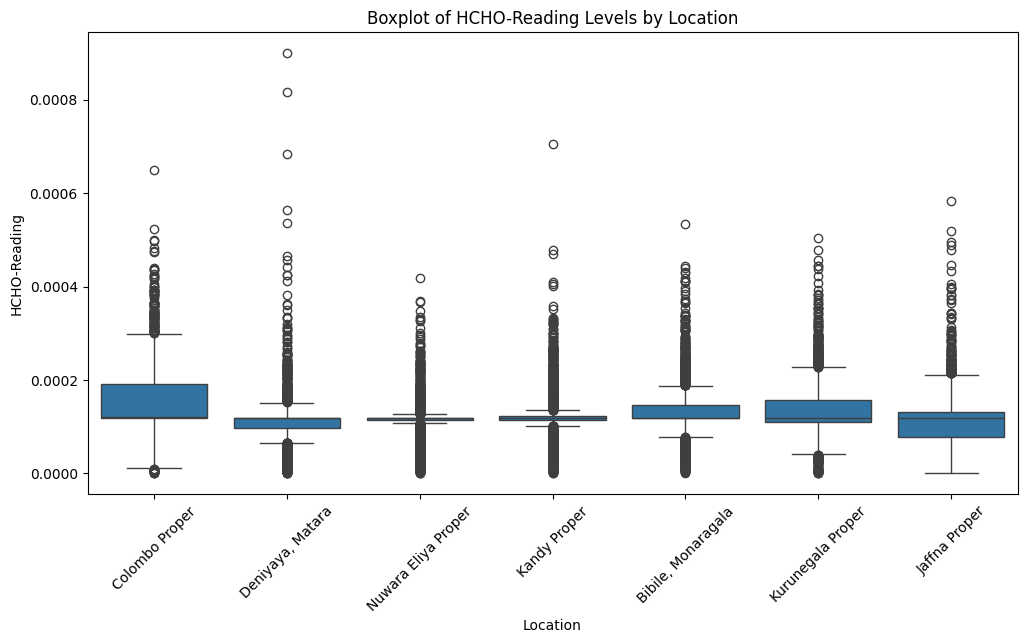

In [25]:
# visualizations - boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='hcho-reading', data=cities_df)
plt.title('Boxplot of HCHO-Reading Levels by Location')
plt.xlabel('Location')
plt.ylabel('HCHO-Reading')
plt.xticks(rotation=45)
plt.show()

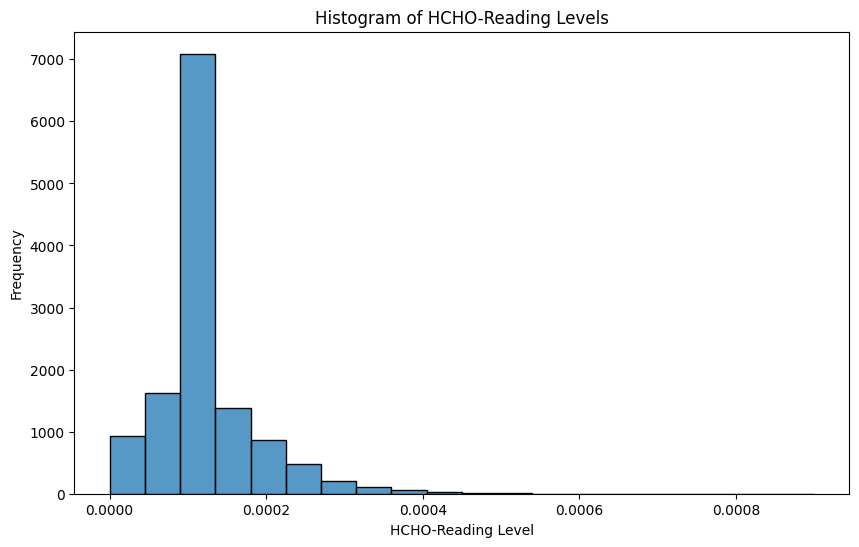

In [26]:
# visualizations - histograms
plt.figure(figsize=(10, 6))
sns.histplot(cities_df['hcho-reading'], bins=20)
plt.title('Histogram of HCHO-Reading Levels')
plt.xlabel('HCHO-Reading Level')
plt.ylabel('Frequency')
plt.show()

In [27]:
cities_df['location'].value_counts()

location
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kandy Proper           1826
Bibile, Monaragala     1826
Kurunegala Proper      1826
Jaffna Proper          1826
Name: count, dtype: int64

In [28]:
print(cities_df.head(1))
print(cities_df.tail(1))

   hcho-reading        location current-date   next-date
0      0.000197  Colombo Proper   2019-01-01  2019-01-02
      hcho-reading       location current-date   next-date
5477      0.000065  Jaffna Proper   2023-12-31  2024-01-01


In [29]:
# first weather dataset
ext_fact_df1 = pd.read_csv('ext_factors.csv',na_values=["?"])
ext_fact_df1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [30]:
ext_fact_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    8745 non-null   object 
 1   NAME       8745 non-null   object 
 2   LATITUDE   8745 non-null   float64
 3   LONGITUDE  8745 non-null   float64
 4   ELEVATION  8745 non-null   float64
 5   DATE       8745 non-null   object 
 6   PRCP       8708 non-null   float64
 7   TAVG       8745 non-null   int64  
 8   TMAX       7786 non-null   float64
 9   TMIN       7099 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 683.3+ KB


In [31]:
# remove STATION column
ext_fact_df1 = ext_fact_df1.drop(columns=['STATION'],axis=1)
ext_fact_df1.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [32]:
# rename columns
ext_fact_df1.rename(columns={
    'NAME': 'location',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'ELEVATION': 'elevation',
    'DATE': 'current-date'}, inplace=True)
ext_fact_df1.head()

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [33]:
# check locations and data count
ext_fact_df1['location'].value_counts()

location
COLOMBO, CE         1765
NUWARA ELIYA, CE    1761
CHINA BAY, CE       1760
PUTTALAM, CE        1755
KURUNEGALA, CE      1704
Name: count, dtype: int64

In [34]:
# remove 'CHINA BAY, CE' and 'PUTTALAM, CE'
ext_fact_df1 = ext_fact_df1[(ext_fact_df1['location'] != 'CHINA BAY, CE') & (ext_fact_df1['location'] != 'PUTTALAM, CE')].reset_index(drop=True)
print("Successfully removed 'CHINA BAY, CE' and 'PUTTALAM, CE' data")

Successfully removed 'CHINA BAY, CE' and 'PUTTALAM, CE' data


In [35]:
# check locations and data count again
ext_fact_df1['location'].value_counts()

location
COLOMBO, CE         1765
NUWARA ELIYA, CE    1761
KURUNEGALA, CE      1704
Name: count, dtype: int64

In [36]:
ext_fact_df1.head()

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [37]:
ext_fact_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5230 entries, 0 to 5229
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      5230 non-null   object 
 1   latitude      5230 non-null   float64
 2   longitude     5230 non-null   float64
 3   elevation     5230 non-null   float64
 4   current-date  5230 non-null   object 
 5   PRCP          5213 non-null   float64
 6   TAVG          5230 non-null   int64  
 7   TMAX          4647 non-null   float64
 8   TMIN          4304 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 367.9+ KB


In [38]:
# check NaN values
ext_fact_df1.isnull().sum()

location          0
latitude          0
longitude         0
elevation         0
current-date      0
PRCP             17
TAVG              0
TMAX            583
TMIN            926
dtype: int64

In [39]:
# NaN values replace from mean of each column
mean = ext_fact_df1['PRCP'].mean()
ext_fact_df1['PRCP'].fillna(mean, inplace=True)

mean = ext_fact_df1['TMAX'].mean()
ext_fact_df1['TMAX'].fillna(mean, inplace=True)

mean = ext_fact_df1['TMIN'].mean()
ext_fact_df1['TMIN'].fillna(mean, inplace=True)

In [40]:
# check NaN values again
ext_fact_df1.isnull().sum()

location        0
latitude        0
longitude       0
elevation       0
current-date    0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
dtype: int64

In [41]:
# replace values in 'location' column
ext_fact_df1['location'] = ext_fact_df1['location'].replace({'COLOMBO, CE': 'Colombo Proper',
                                                           'NUWARA ELIYA, CE': 'Nuwara Eliya Proper',
                                                           'KURUNEGALA, CE': 'Kurunegala Proper'})

In [42]:
# check location name changes
ext_fact_df1['location'].value_counts()

location
Colombo Proper         1765
Nuwara Eliya Proper    1761
Kurunegala Proper      1704
Name: count, dtype: int64

In [43]:
ext_fact_df1

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,Kurunegala Proper,7.467,80.367,116.0,2019-01-02,0.00,78,82.259307,72.0
1,Kurunegala Proper,7.467,80.367,116.0,2019-01-03,0.00,81,87.000000,71.0
2,Kurunegala Proper,7.467,80.367,116.0,2019-01-04,0.00,83,88.000000,69.0
3,Kurunegala Proper,7.467,80.367,116.0,2019-01-05,0.00,84,90.000000,65.0
4,Kurunegala Proper,7.467,80.367,116.0,2019-01-06,0.00,82,88.000000,71.0
...,...,...,...,...,...,...,...,...,...
5225,Nuwara Eliya Proper,6.967,80.767,1880.0,2023-12-27,0.35,61,64.000000,59.0
5226,Nuwara Eliya Proper,6.967,80.767,1880.0,2023-12-28,2.44,61,62.000000,60.0
5227,Nuwara Eliya Proper,6.967,80.767,1880.0,2023-12-29,0.64,60,61.000000,59.0
5228,Nuwara Eliya Proper,6.967,80.767,1880.0,2023-12-30,0.21,60,65.000000,57.0


In [44]:
# second weather dataset
ext_fact_df2 = pd.read_csv('sl_weather_dataset.csv',na_values=["?"])
ext_fact_df2.head()

,city,latitude,longitude,elevation,time,precipitation_sum,temperature_2m_mean,temperature_2m_max,temperature_2m_min
0,Colombo,7.0,79.899994,16,2010-01-01,0.0,26.1,30.0,22.7
1,Colombo,7.0,79.899994,16,2010-01-02,0.1,26.2,29.9,23.5
2,Colombo,7.0,79.899994,16,2010-01-03,0.6,26.0,29.5,23.2
3,Colombo,7.0,79.899994,16,2010-01-04,0.0,25.3,28.9,21.9
4,Colombo,7.0,79.899994,16,2010-01-05,0.0,24.5,28.1,21.3


In [45]:
# rename columns
ext_fact_df2.rename(columns={
    'city': 'location',
    'time': 'current-date',
    'precipitation_sum': 'PRCP',
    'temperature_2m_mean': 'TAVG',
    'temperature_2m_max': 'TMAX',
    'temperature_2m_min': 'TMIN'}, inplace=True)
ext_fact_df2.head()

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,Colombo,7.0,79.899994,16,2010-01-01,0.0,26.1,30.0,22.7
1,Colombo,7.0,79.899994,16,2010-01-02,0.1,26.2,29.9,23.5
2,Colombo,7.0,79.899994,16,2010-01-03,0.6,26.0,29.5,23.2
3,Colombo,7.0,79.899994,16,2010-01-04,0.0,25.3,28.9,21.9
4,Colombo,7.0,79.899994,16,2010-01-05,0.0,24.5,28.1,21.3


In [46]:
# check locations and data count
ext_fact_df2['location'].value_counts()

location
Colombo                      4916
Mount Lavinia                4916
Hambantota                   4916
Hatton                       4916
Mabole                       4916
Kurunegala                   4916
Pothuhera                    4916
Mannar                       4916
Matale                       4916
Bentota                      4916
Kalutara                     4916
Badulla                      4916
Puttalam                     4916
Gampaha                      4916
Kolonnawa                    4916
Matara                       4916
Weligama                     4916
Athurugiriya                 4916
Jaffna                       4916
Galle                        4916
Trincomalee                  4916
Kalmunai                     4916
Sri Jayewardenepura Kotte    4916
Negombo                      4916
Kandy                        4916
Ratnapura                    4916
Maharagama                   4916
Moratuwa                     4916
Kesbewa                      4916
Oruwa

In [47]:
# remove not needed locations
ext_fact_df2 = ext_fact_df2[(ext_fact_df2['location'] != 'Colombo') & 
(ext_fact_df2['location'] != 'Mount Lavinia') &
(ext_fact_df2['location'] != 'Hambantota') &
(ext_fact_df2['location'] != 'Hatton') &
(ext_fact_df2['location'] != 'Mabole') &
(ext_fact_df2['location'] != 'Kurunegala') &
(ext_fact_df2['location'] != 'Pothuhera') &
(ext_fact_df2['location'] != 'Mannar') &
(ext_fact_df2['location'] != 'Matale') &
(ext_fact_df2['location'] != 'Bentota') &
(ext_fact_df2['location'] != 'Kalutara') &
(ext_fact_df2['location'] != 'Badulla') &
(ext_fact_df2['location'] != 'Puttalam') &
(ext_fact_df2['location'] != 'Gampaha') &
(ext_fact_df2['location'] != 'Kolonnawa') &
(ext_fact_df2['location'] != 'Weligama') &
(ext_fact_df2['location'] != 'Athurugiriya') &
(ext_fact_df2['location'] != 'Galle') &
(ext_fact_df2['location'] != 'Trincomalee') &
(ext_fact_df2['location'] != 'Kalmunai') &
(ext_fact_df2['location'] != 'Sri Jayewardenepura Kotte') &
(ext_fact_df2['location'] != 'Negombo') &
(ext_fact_df2['location'] != 'Ratnapura') &
(ext_fact_df2['location'] != 'Maharagama') &
(ext_fact_df2['location'] != 'Moratuwa') &
(ext_fact_df2['location'] != 'Kesbewa') &
(ext_fact_df2['location'] != 'Oruwala')].reset_index(drop=True)

print("Successfully removed locations.")

Successfully removed locations.


In [48]:
# check locations and data count again
ext_fact_df2['location'].value_counts()

location
Kandy     4916
Jaffna    4916
Matara    4916
Name: count, dtype: int64

In [49]:
# check current date range
date = ext_fact_df2.groupby('location')['current-date'].agg(['min', 'max'])
print(date)

                 min         max
location                        
Jaffna    2010-01-01  2023-06-17
Kandy     2010-01-01  2023-06-17
Matara    2010-01-01  2023-06-17


In [50]:
# getting only 2019-01-01 to forward dates
ext_fact_df2 = ext_fact_df2[ext_fact_df2['current-date'] >= '2019-01-01']

In [51]:
# check current date range again
date = ext_fact_df2.groupby('location')['current-date'].agg(['min', 'max'])
print(date)

                 min         max
location                        
Jaffna    2019-01-01  2023-06-17
Kandy     2019-01-01  2023-06-17
Matara    2019-01-01  2023-06-17


In [52]:
ext_fact_df2=ext_fact_df2.reset_index(drop=True)

In [53]:
ext_fact_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      4887 non-null   object 
 1   latitude      4887 non-null   float64
 2   longitude     4887 non-null   float64
 3   elevation     4887 non-null   int64  
 4   current-date  4887 non-null   object 
 5   PRCP          4887 non-null   float64
 6   TAVG          4887 non-null   float64
 7   TMAX          4887 non-null   float64
 8   TMIN          4887 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 343.7+ KB


In [54]:
# replace values in 'location' column
ext_fact_df2['location'] = ext_fact_df2['location'].replace({'Jaffna': 'Jaffna Proper',
                                                           'Kandy': 'Kandy Proper',
                                                           'Matara': 'Deniyaya, Matara'})

In [55]:
# check location name changes
ext_fact_df2['location'].value_counts()

location
Kandy Proper        1629
Jaffna Proper       1629
Deniyaya, Matara    1629
Name: count, dtype: int64

In [56]:
ext_fact_df2

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,Kandy Proper,7.300003,80.600006,510,2019-01-01,0.0,21.8,24.6,19.5
1,Kandy Proper,7.300003,80.600006,510,2019-01-02,0.0,20.9,24.2,18.1
2,Kandy Proper,7.300003,80.600006,510,2019-01-03,0.0,21.2,25.7,17.7
3,Kandy Proper,7.300003,80.600006,510,2019-01-04,0.0,20.6,25.1,17.0
4,Kandy Proper,7.300003,80.600006,510,2019-01-05,0.0,21.8,25.6,17.7
...,...,...,...,...,...,...,...,...,...
4882,"Deniyaya, Matara",6.000000,80.399994,7,2023-06-13,8.0,26.8,28.8,25.6
4883,"Deniyaya, Matara",6.000000,80.399994,7,2023-06-14,5.6,27.2,28.7,25.8
4884,"Deniyaya, Matara",6.000000,80.399994,7,2023-06-15,2.2,27.6,29.0,26.8
4885,"Deniyaya, Matara",6.000000,80.399994,7,2023-06-16,3.0,27.6,29.1,26.5


In [57]:
# all weather dataset
final_weather_df = pd.concat([ext_fact_df1,ext_fact_df2])
final_weather_df.head()

,location,latitude,longitude,elevation,current-date,PRCP,TAVG,TMAX,TMIN
0,Kurunegala Proper,7.467,80.367,116.0,2019-01-02,0.0,78.0,82.259307,72.0
1,Kurunegala Proper,7.467,80.367,116.0,2019-01-03,0.0,81.0,87.000000,71.0
2,Kurunegala Proper,7.467,80.367,116.0,2019-01-04,0.0,83.0,88.000000,69.0
3,Kurunegala Proper,7.467,80.367,116.0,2019-01-05,0.0,84.0,90.000000,65.0
4,Kurunegala Proper,7.467,80.367,116.0,2019-01-06,0.0,82.0,88.000000,71.0


In [58]:
final_df = pd.merge(cities_df, final_weather_df, on=['location', 'current-date'], how='inner')
final_df.head()

,hcho-reading,location,current-date,next-date,latitude,longitude,elevation,PRCP,TAVG,TMAX,TMIN
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,6.9,79.867,7.0,0.0,81.0,89.000000,74.0
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,6.9,79.867,7.0,0.0,78.0,82.259307,74.0
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,6.9,79.867,7.0,0.0,81.0,90.000000,74.0
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,6.9,79.867,7.0,0.0,81.0,91.000000,72.0
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,6.9,79.867,7.0,0.0,81.0,90.000000,74.0


In [59]:
from matplotlib.dates import YearLocator

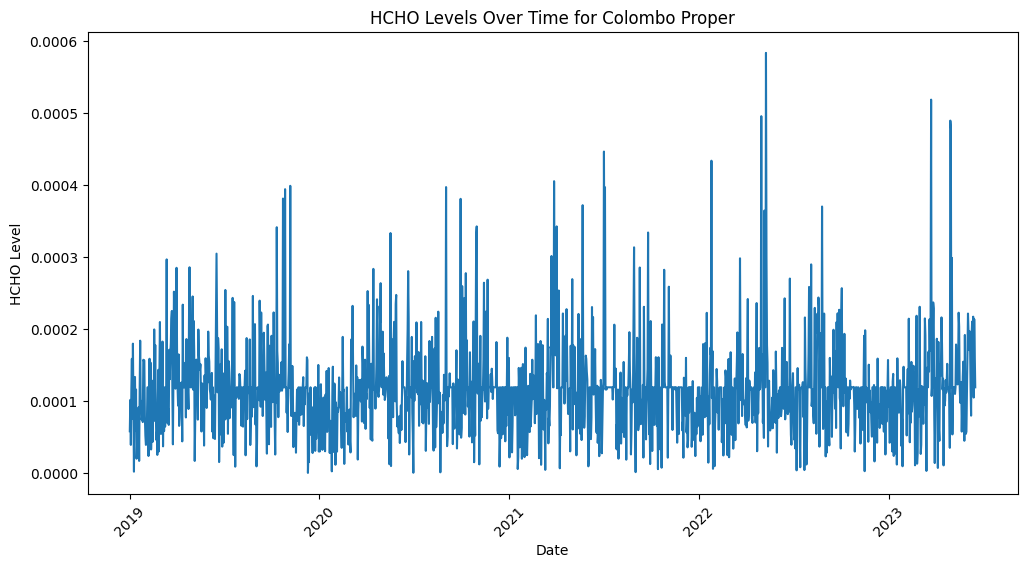

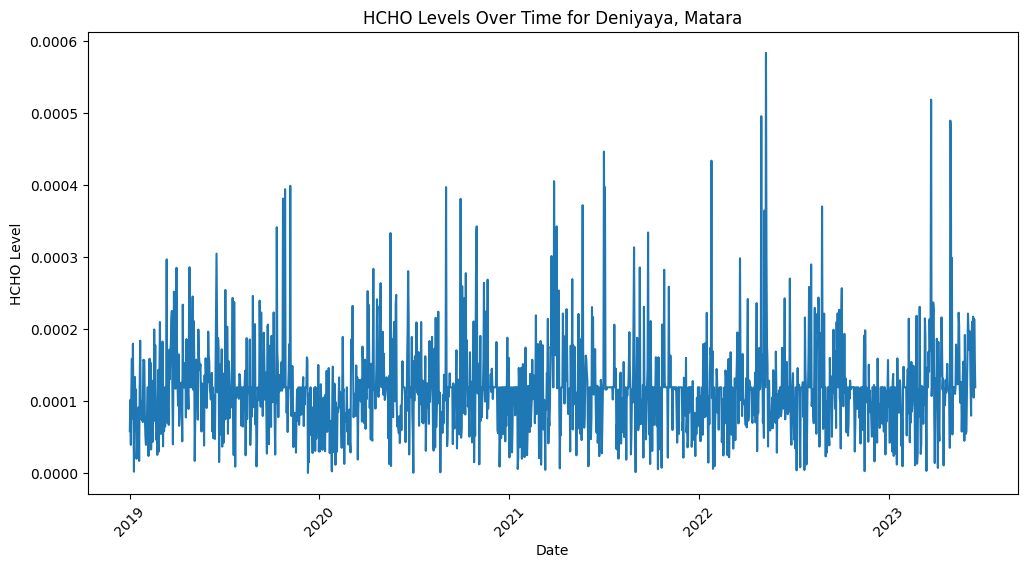

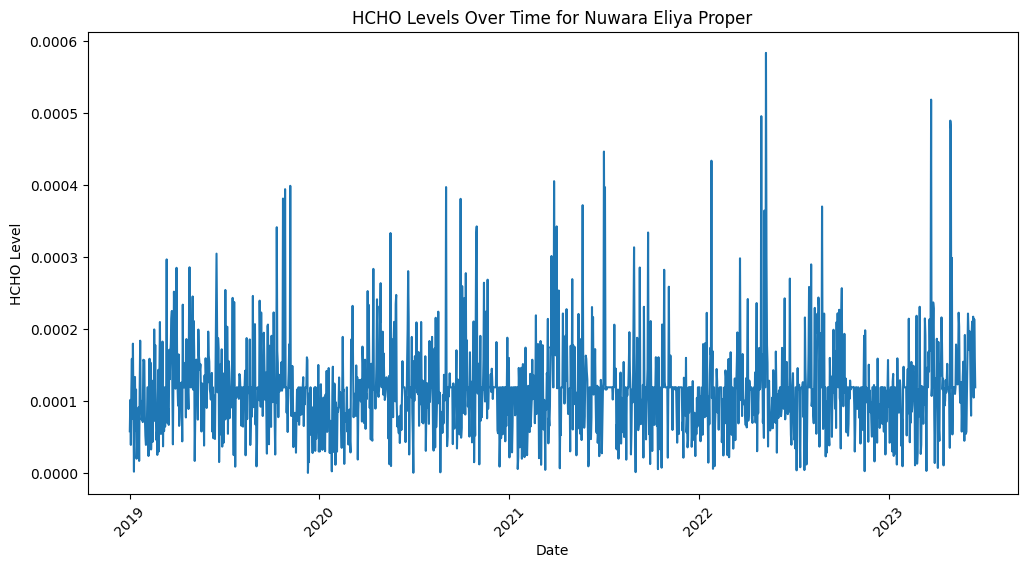

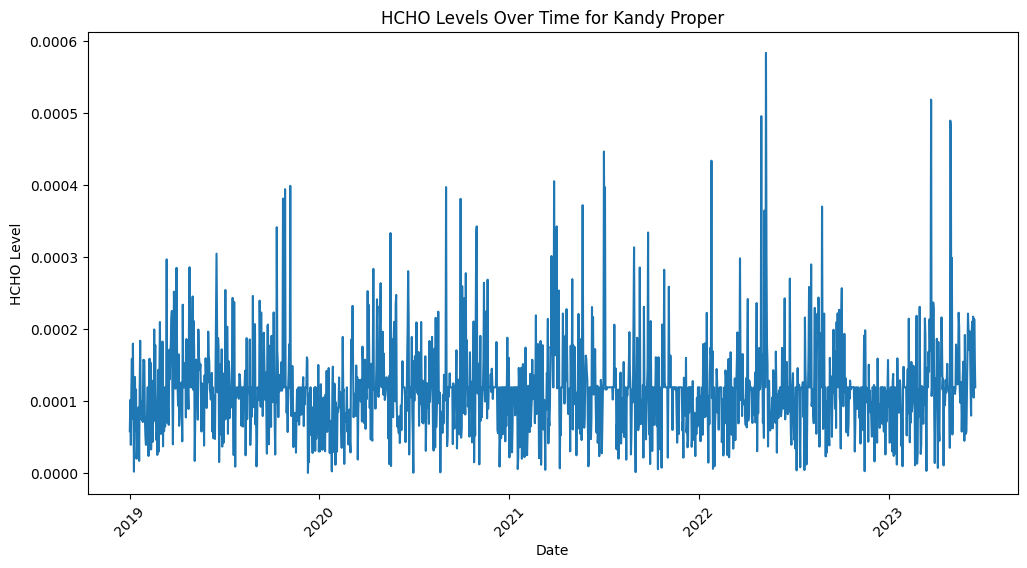

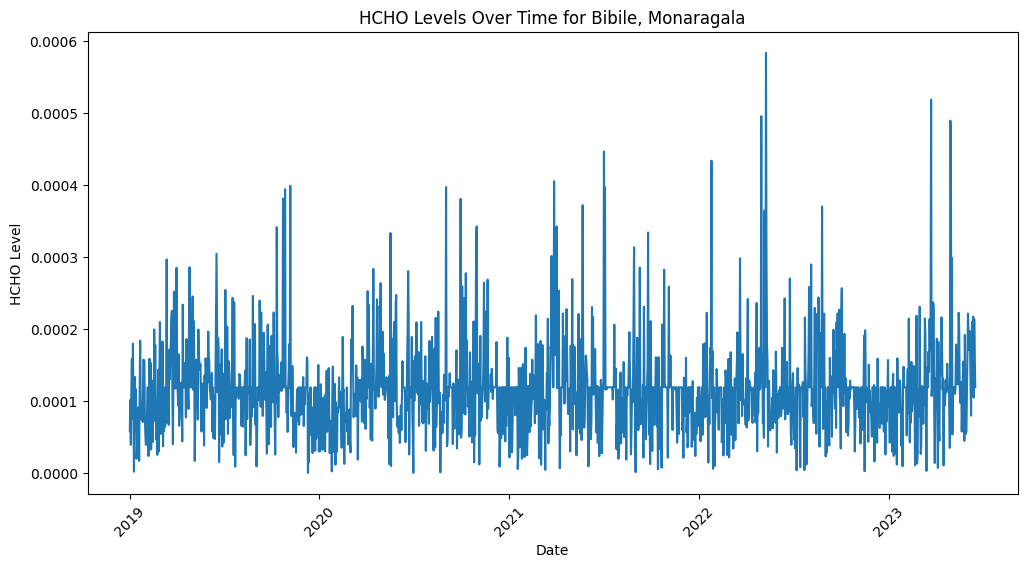

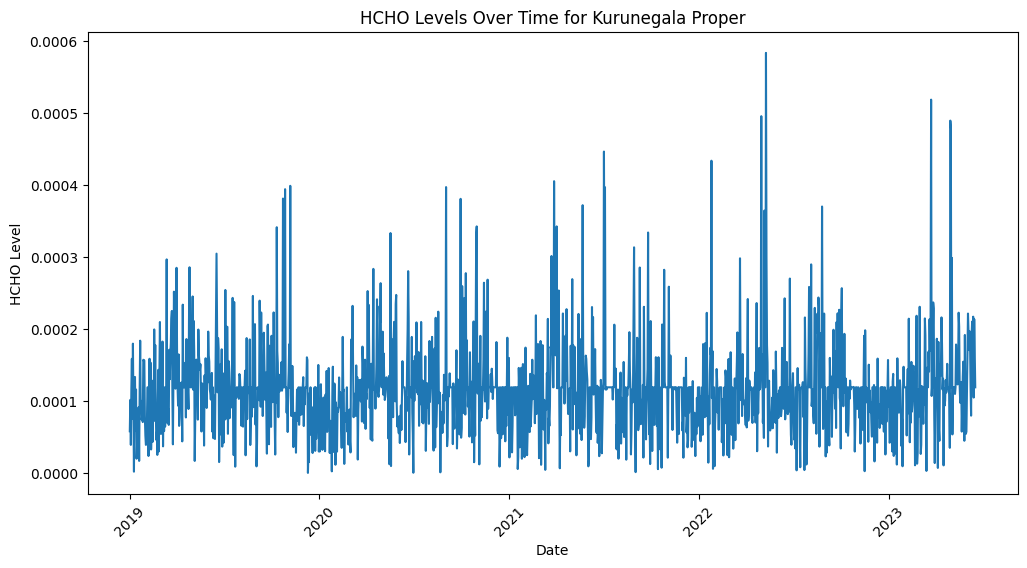

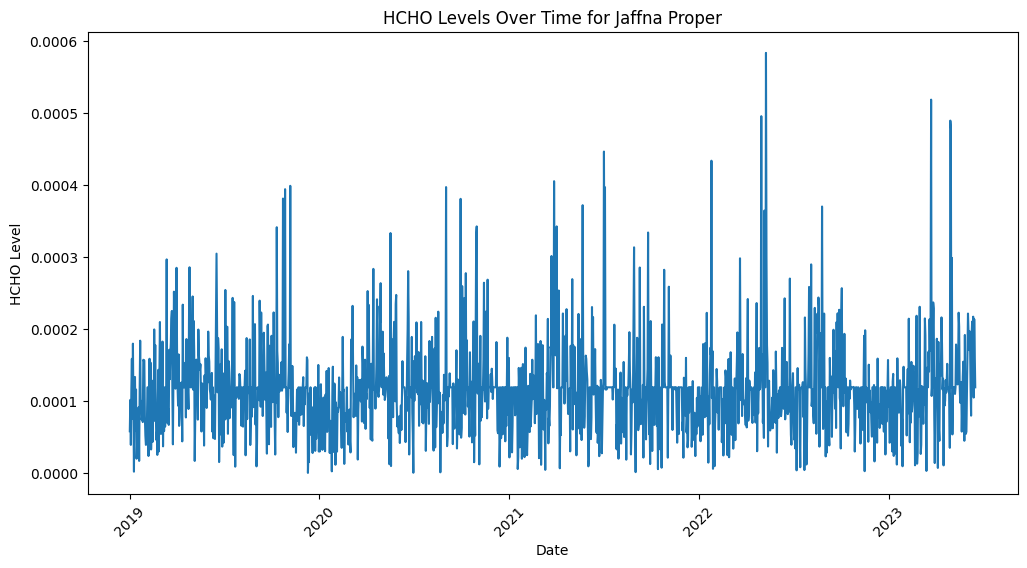

In [91]:
# Analyse trends over time

# convert to datetime
final_df['current-date'] = pd.to_datetime(final_df['current-date'])

lst = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper']


for location in lst:
    # specific location
    specific_location = final_df[final_df['location'] == location]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=specific_location, x='current-date', y='hcho-reading')
    plt.title(f'HCHO Levels Over Time for {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(YearLocator()) # display only years
    plt.show()

In [66]:
# Correlate HCHO levels with external factors

factors = ['PRCP', 'TAVG', 'TMIN', 'TMAX']

for column in factors:
    correlation = final_df.groupby('location')[['hcho-reading', column]].corr().unstack()['hcho-reading'][column]
    print(f"Correlation between HCHO levels and {column}")
    print(correlation,"\n")

Correlation between HCHO levels and PRCP
location
Colombo Proper        -0.064026
Deniyaya, Matara       0.010663
Jaffna Proper          0.033601
Kandy Proper          -0.013909
Kurunegala Proper     -0.015831
Nuwara Eliya Proper    0.012926
Name: PRCP, dtype: float64 

Correlation between HCHO levels and TAVG
location
Colombo Proper        -0.037459
Deniyaya, Matara      -0.001875
Jaffna Proper          0.199093
Kandy Proper           0.133297
Kurunegala Proper      0.163213
Nuwara Eliya Proper   -0.002774
Name: TAVG, dtype: float64 

Correlation between HCHO levels and TMIN
location
Colombo Proper        -0.083784
Deniyaya, Matara      -0.058518
Jaffna Proper          0.158973
Kandy Proper          -0.041053
Kurunegala Proper     -0.080265
Nuwara Eliya Proper   -0.003942
Name: TMIN, dtype: float64 

Correlation between HCHO levels and TMAX
location
Colombo Proper         0.139384
Deniyaya, Matara       0.057126
Jaffna Proper          0.206455
Kandy Proper           0.189877
Kurunegal

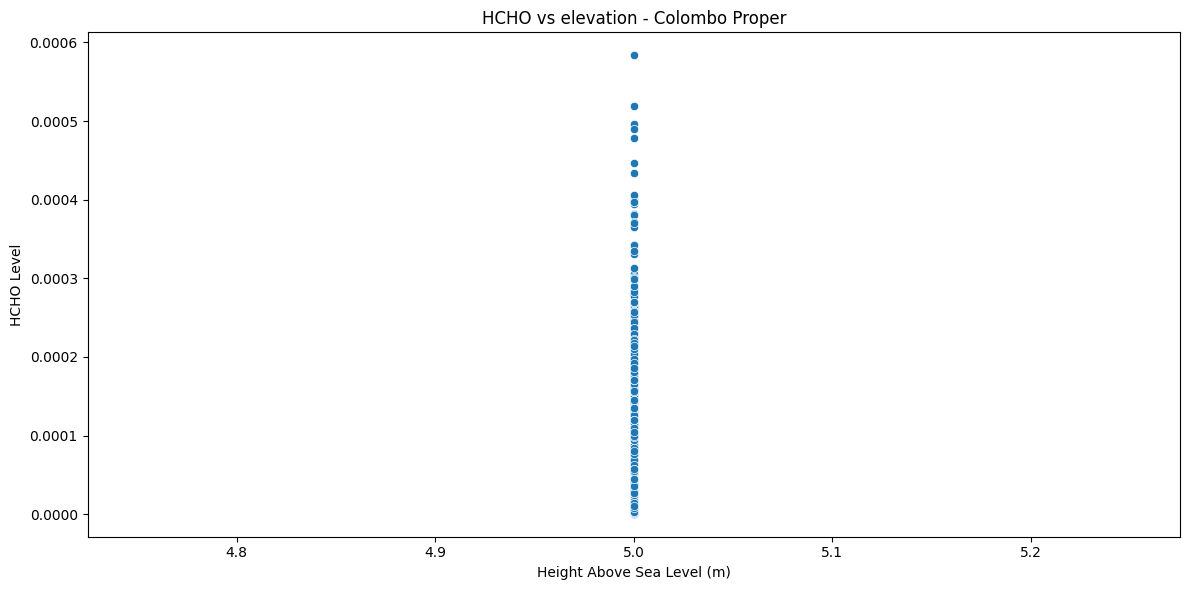

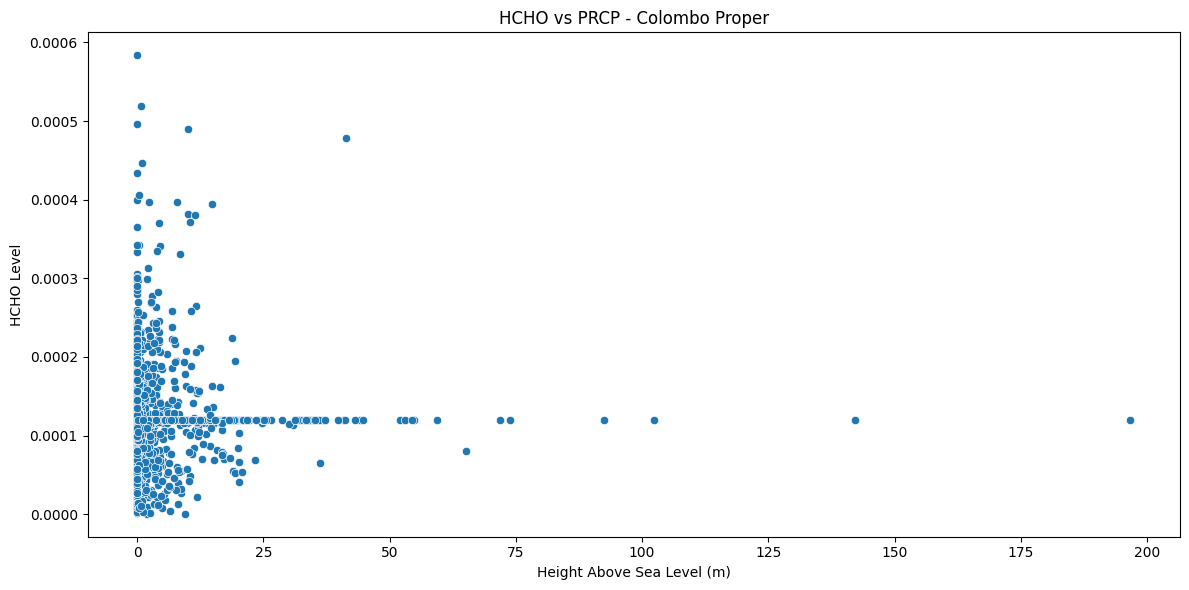

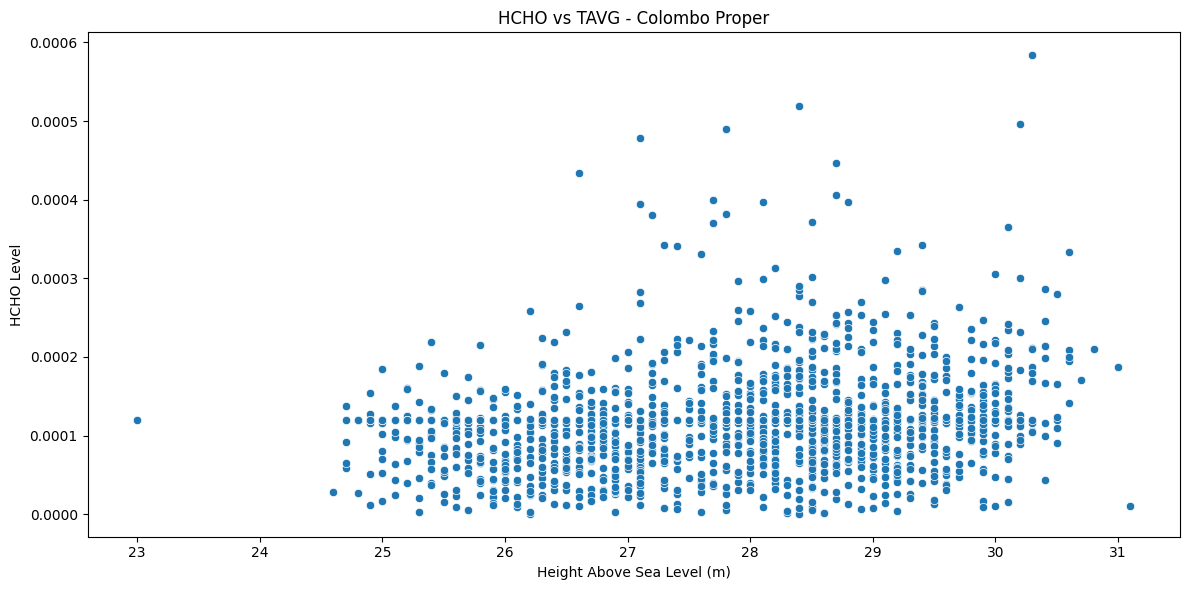

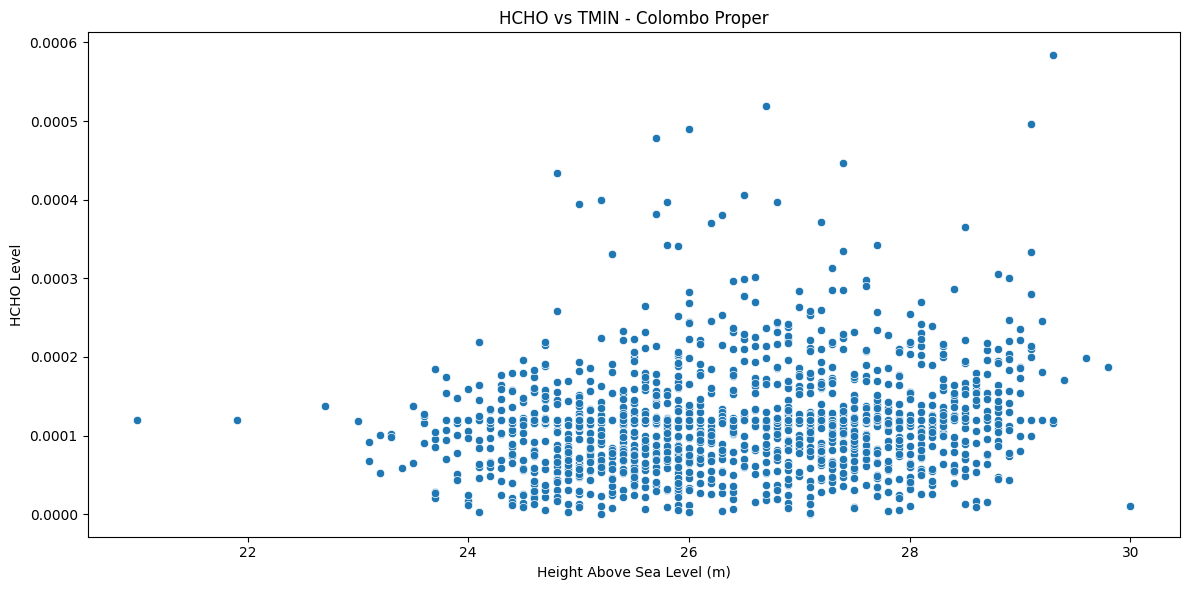

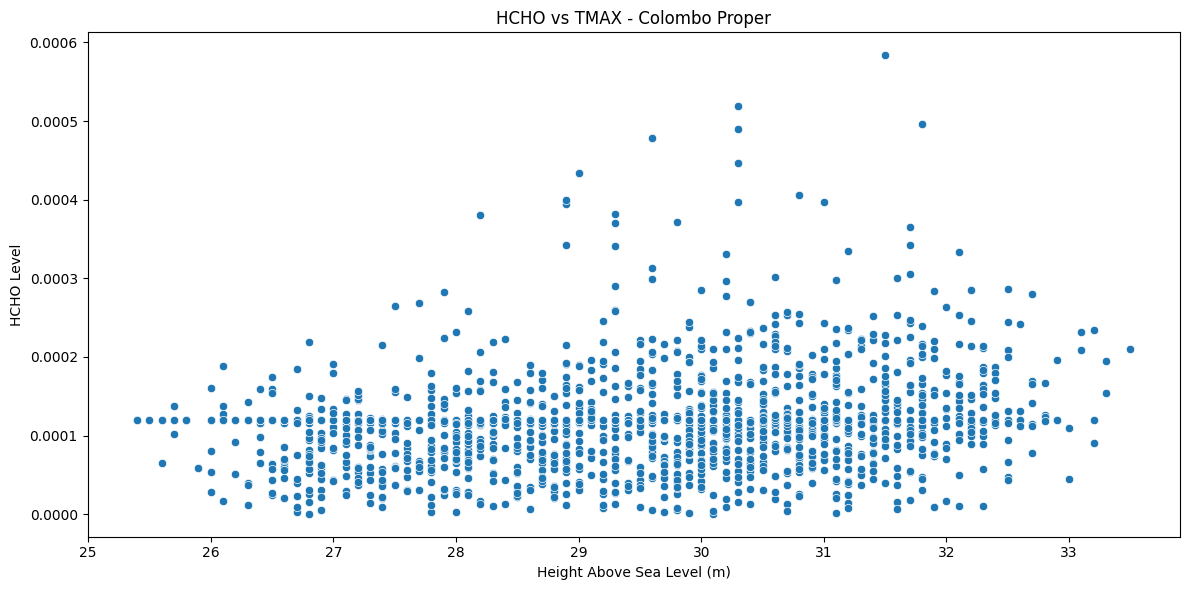

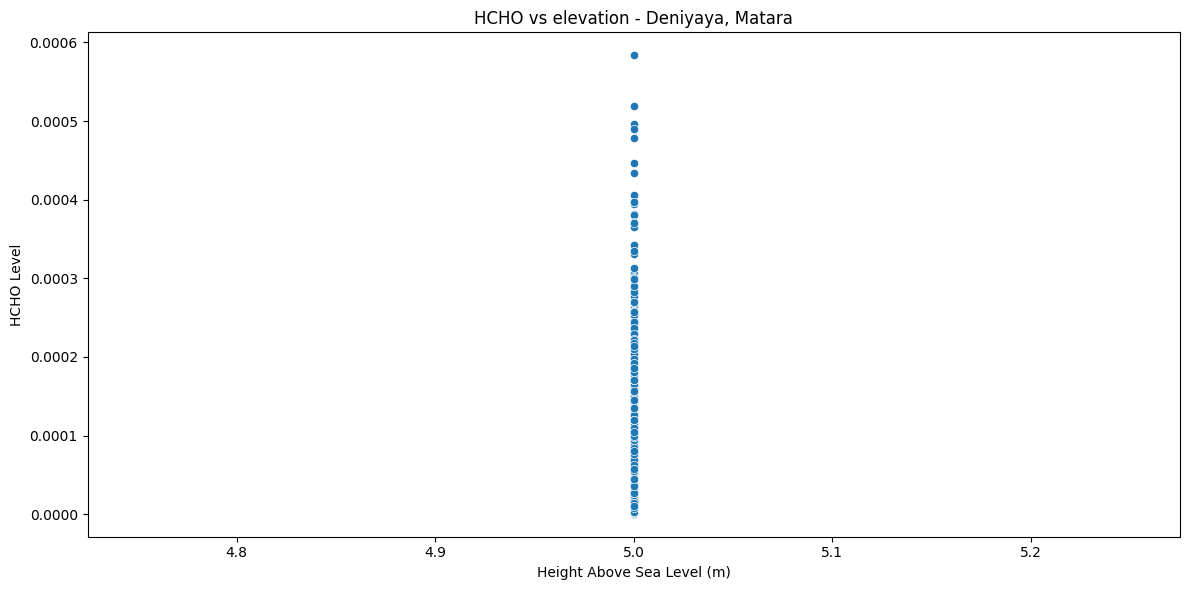

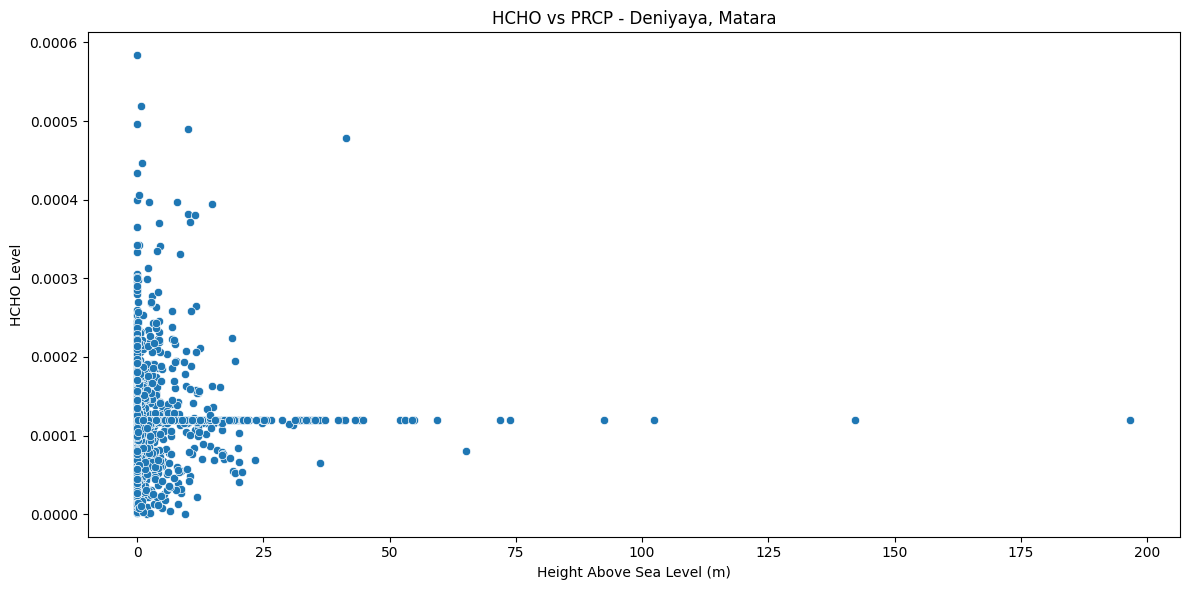

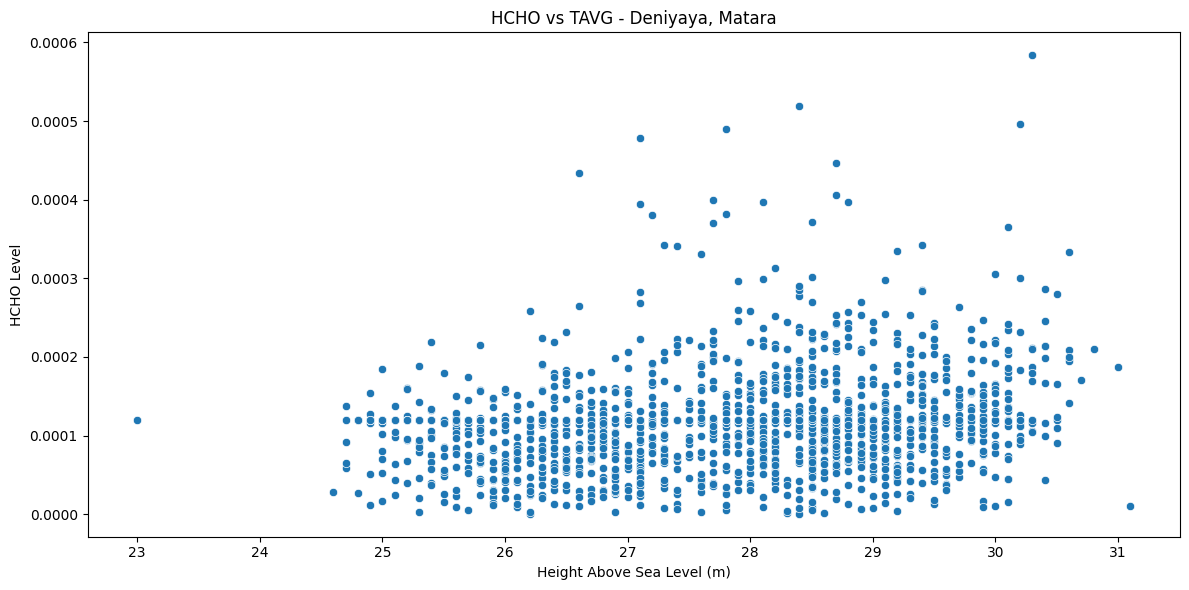

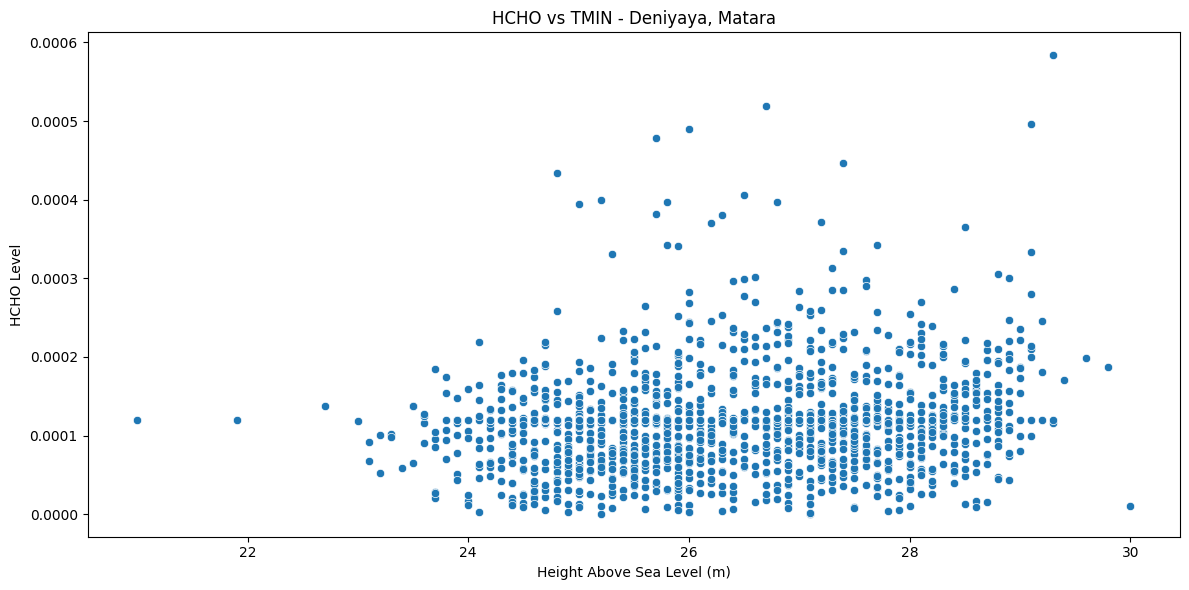

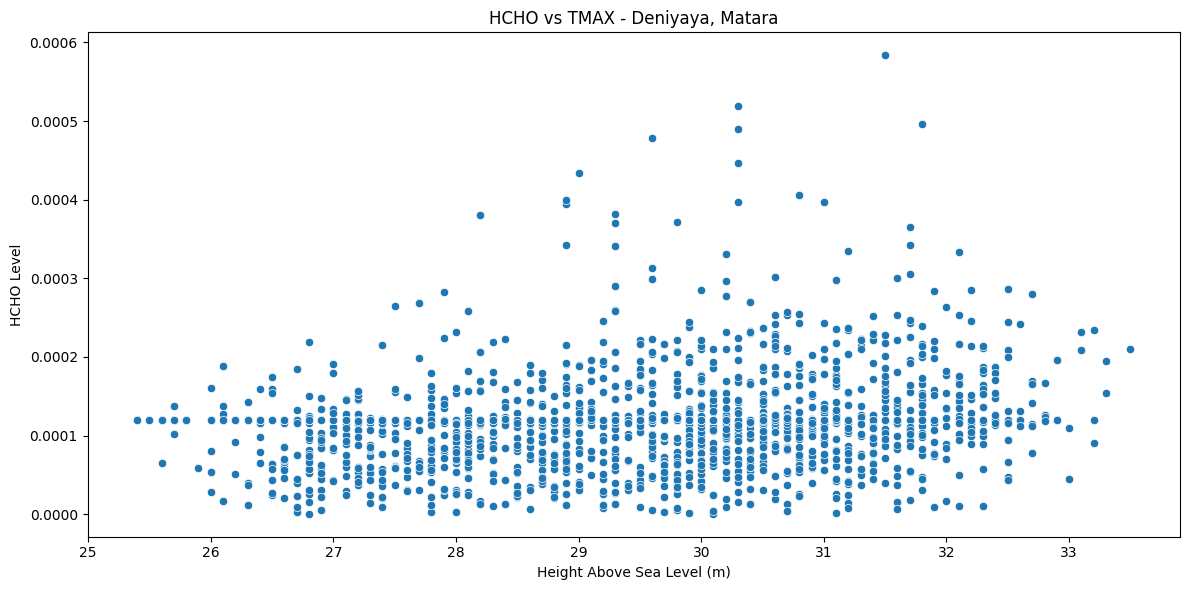

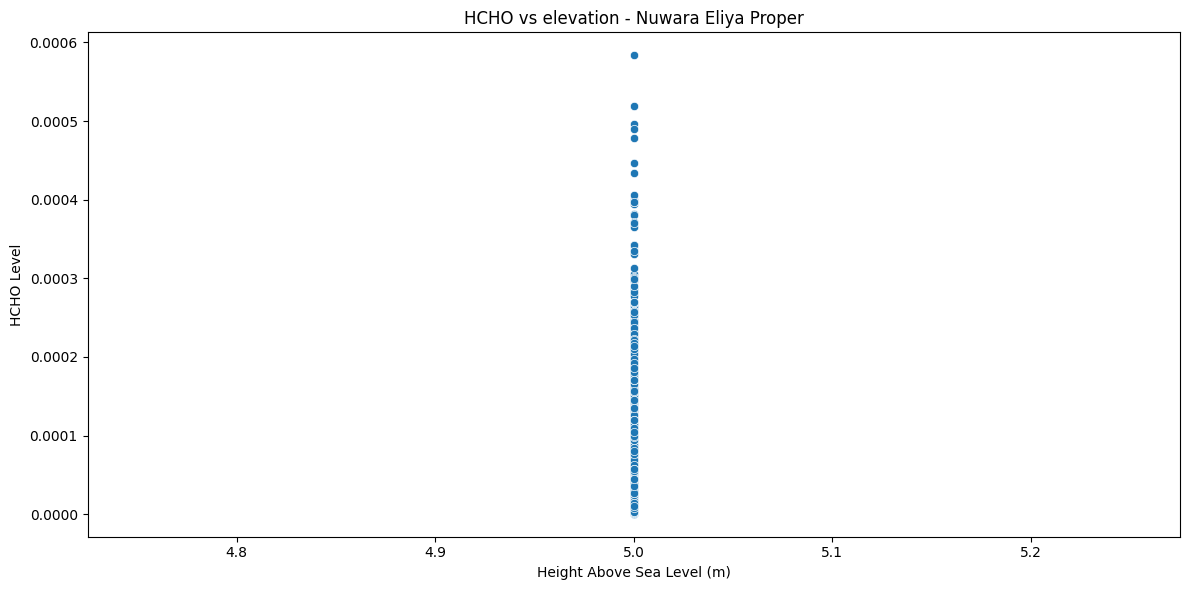

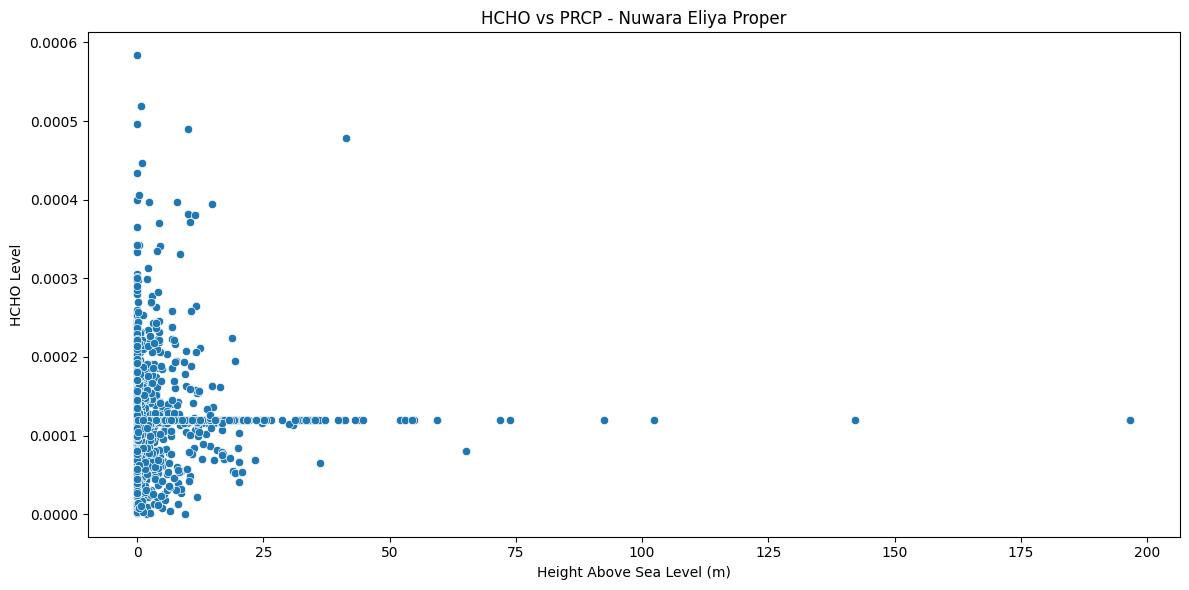

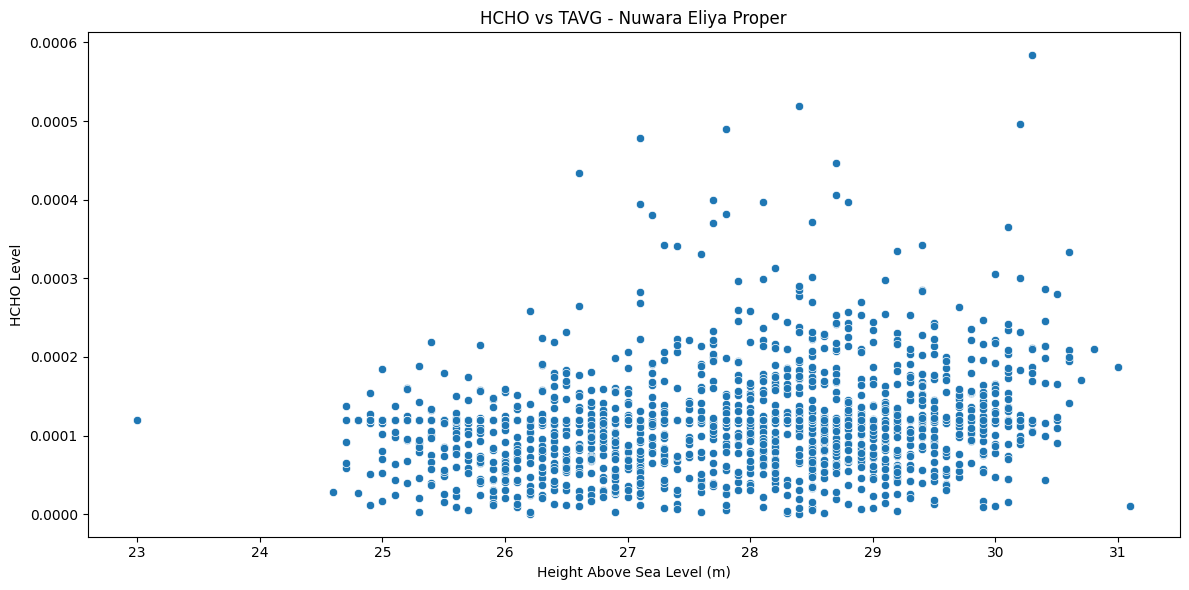

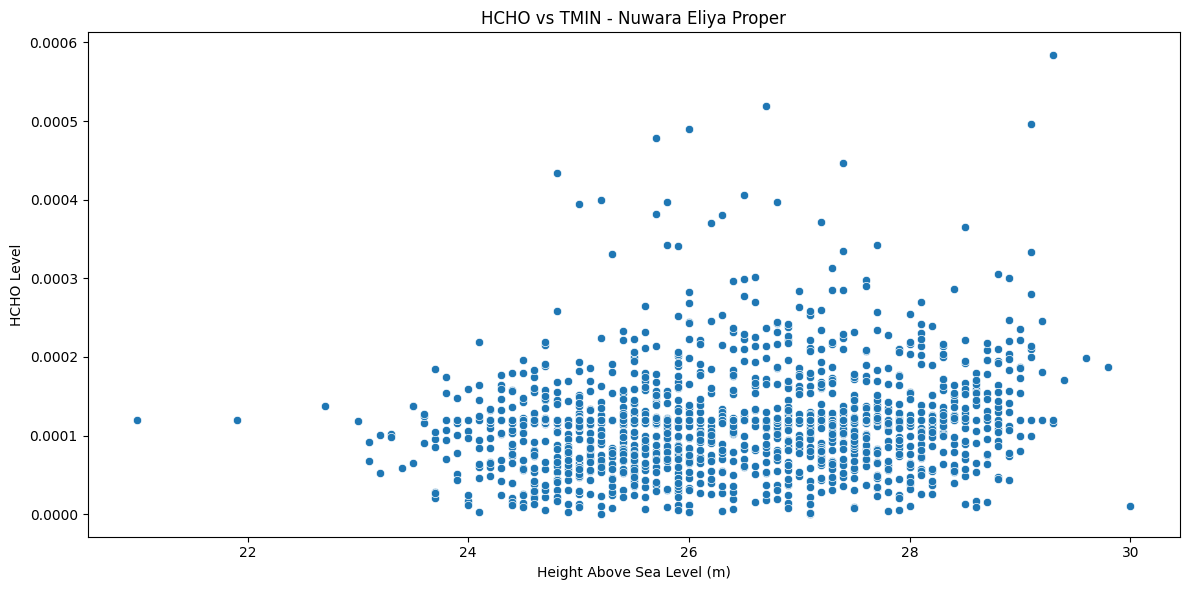

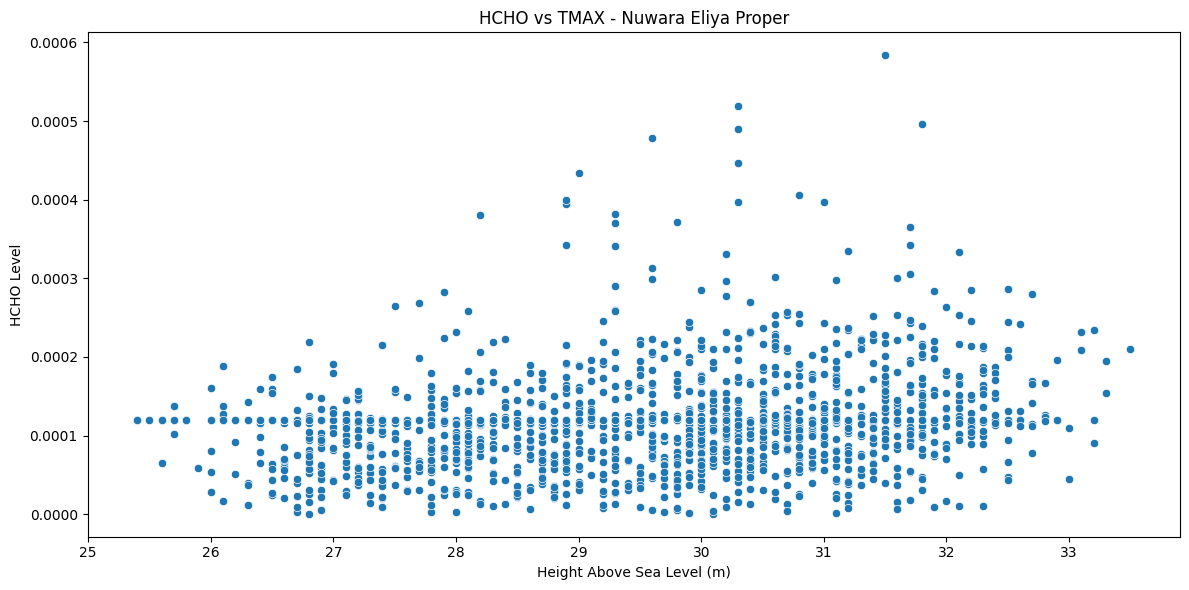

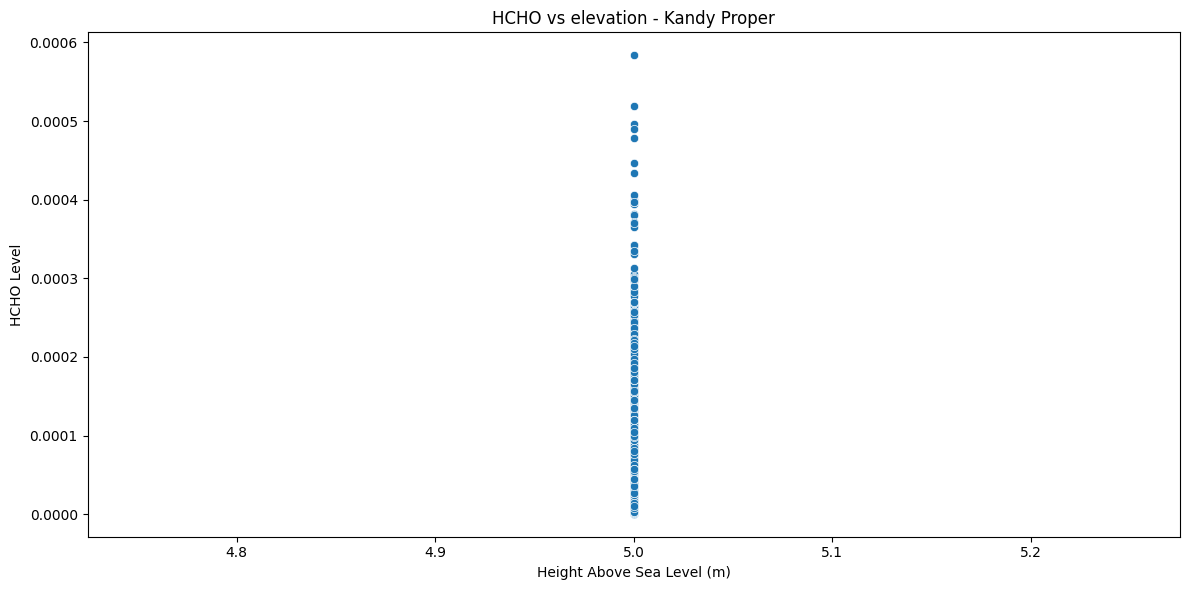

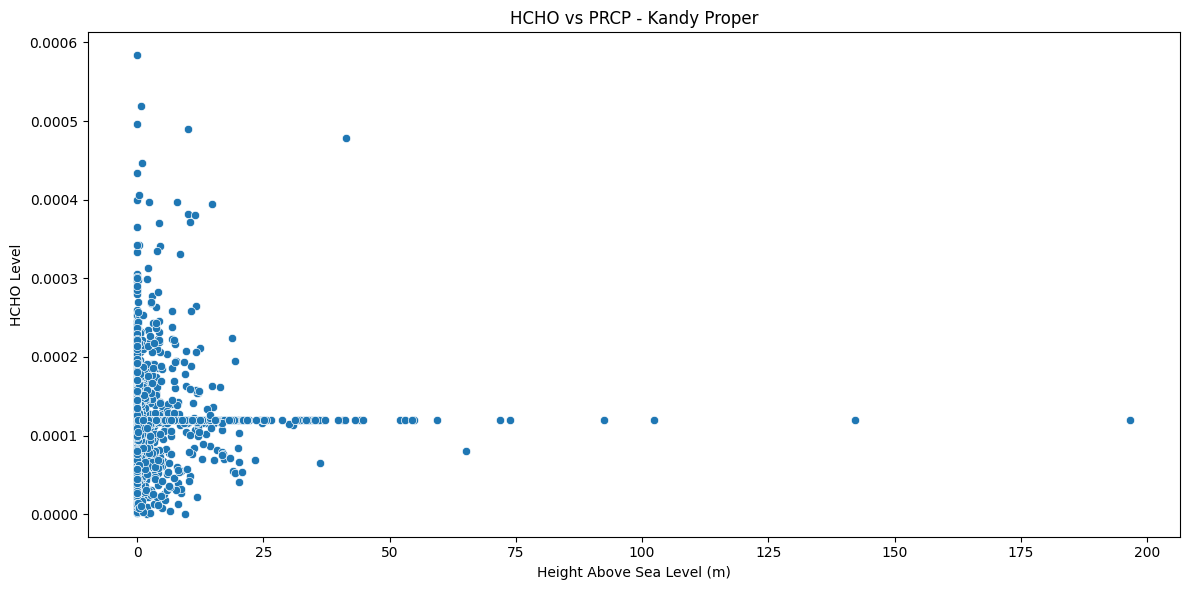

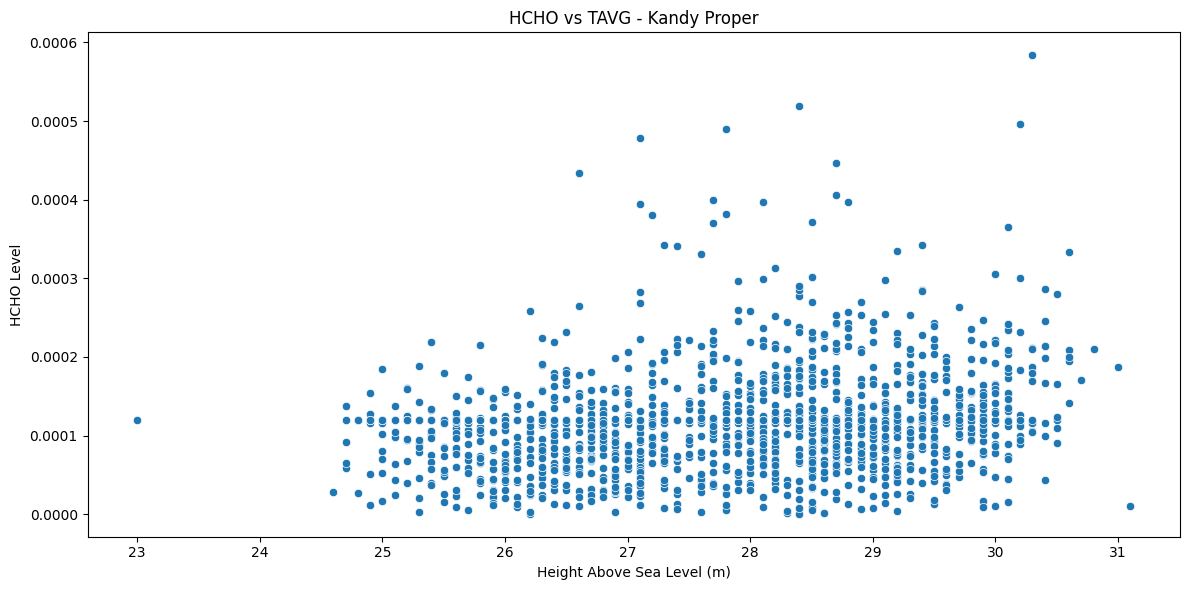

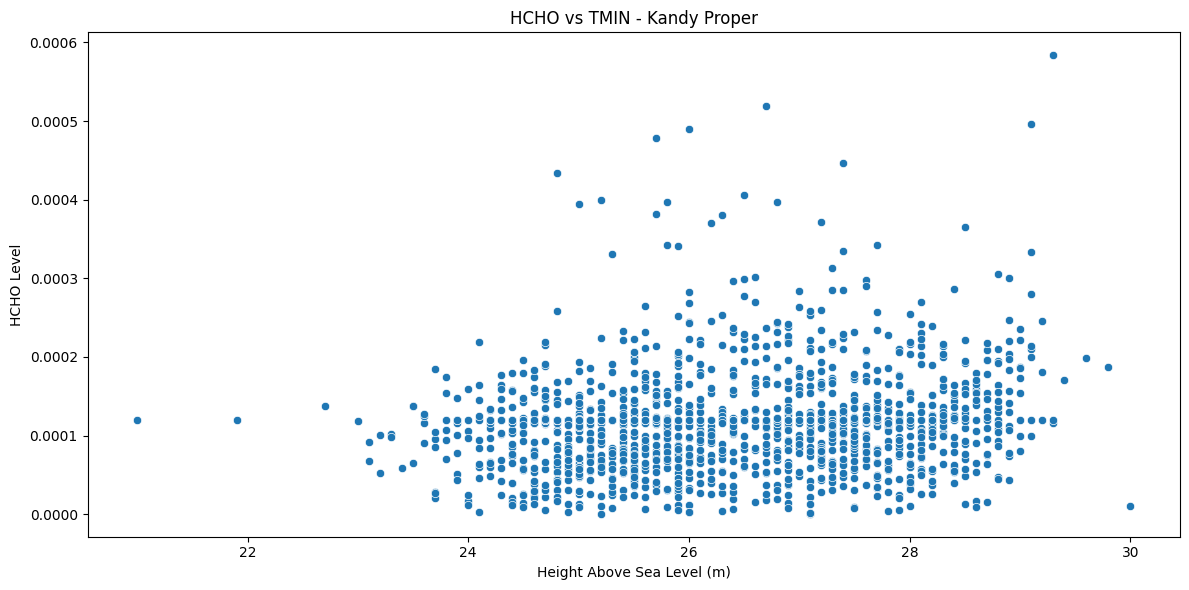

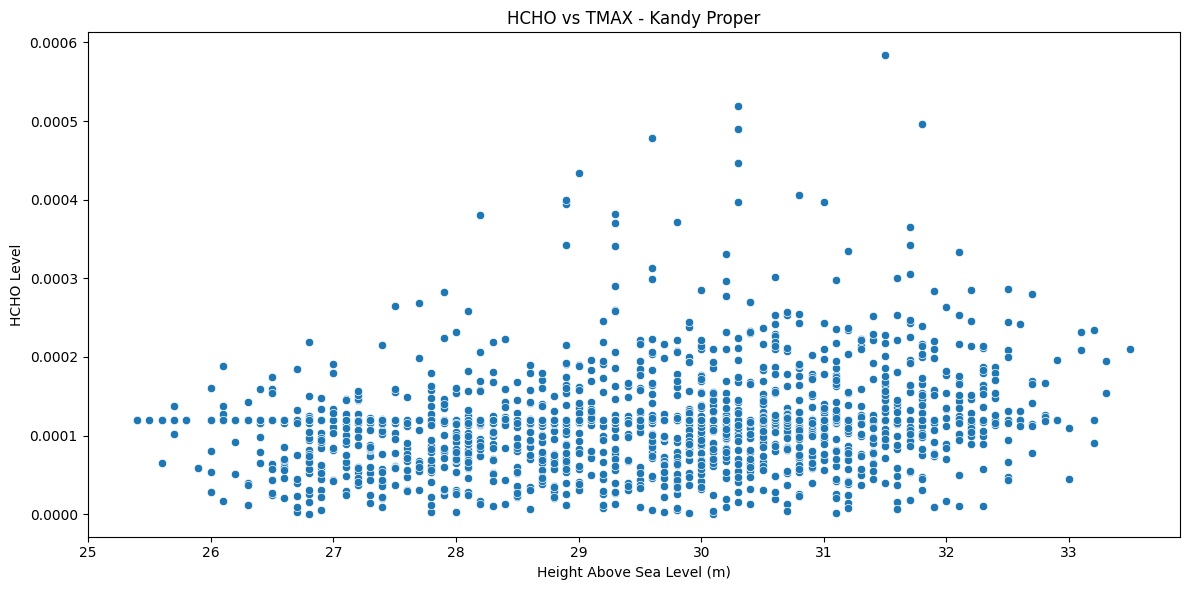

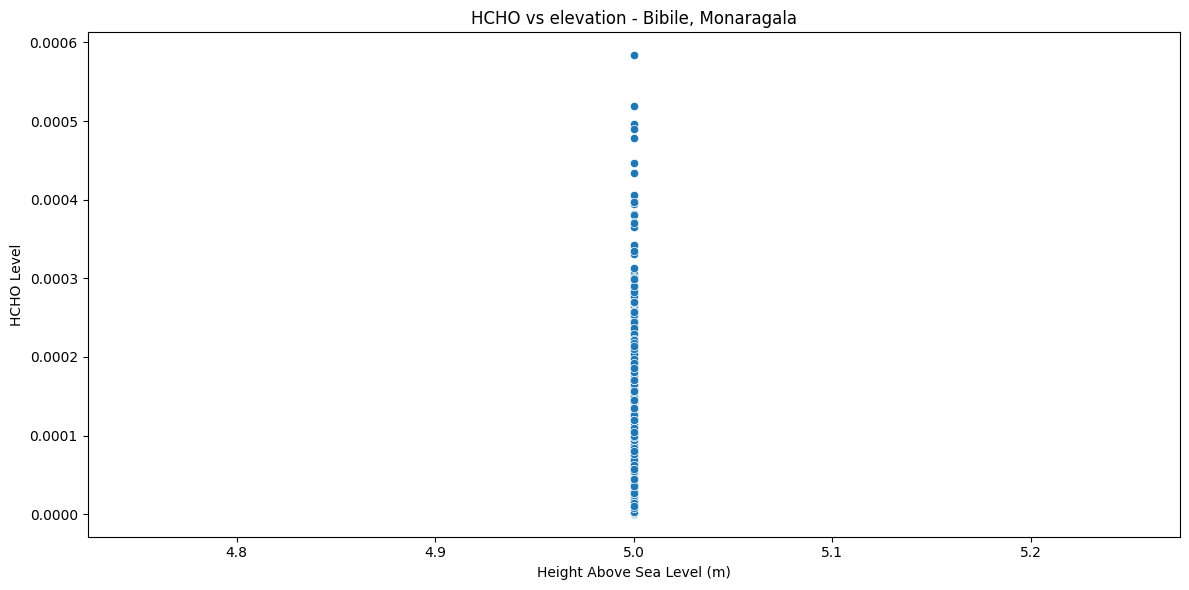

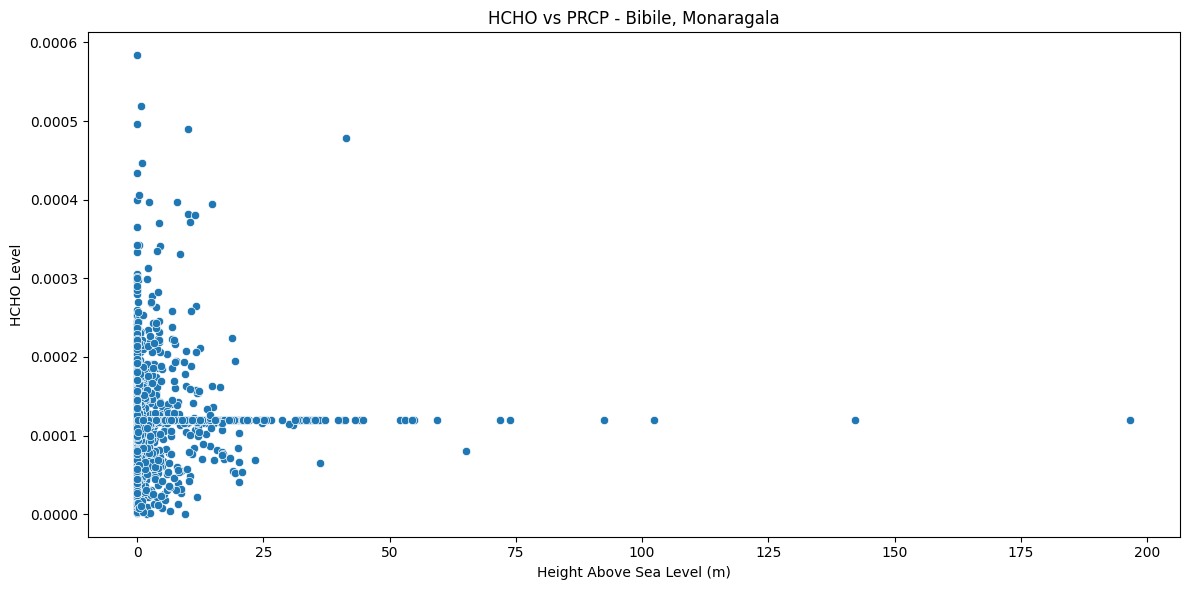

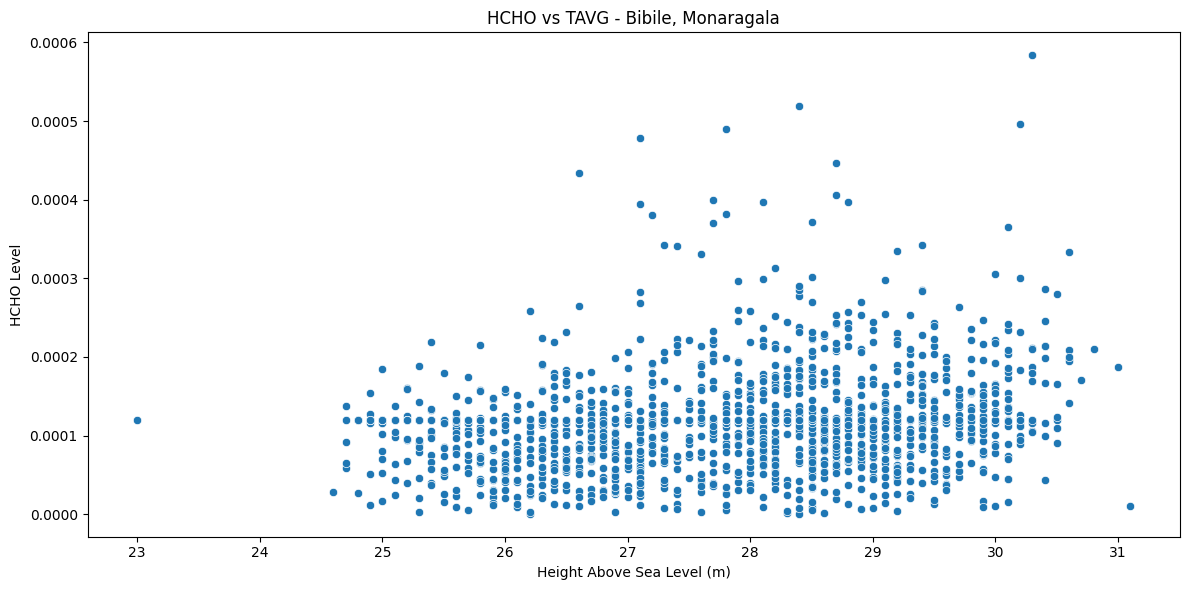

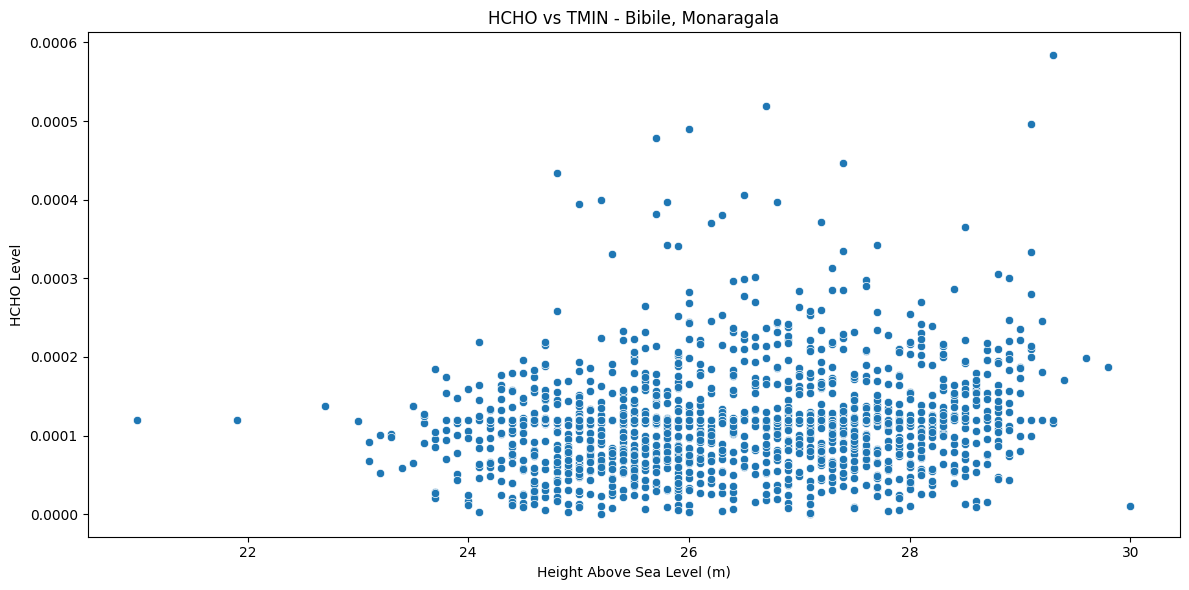

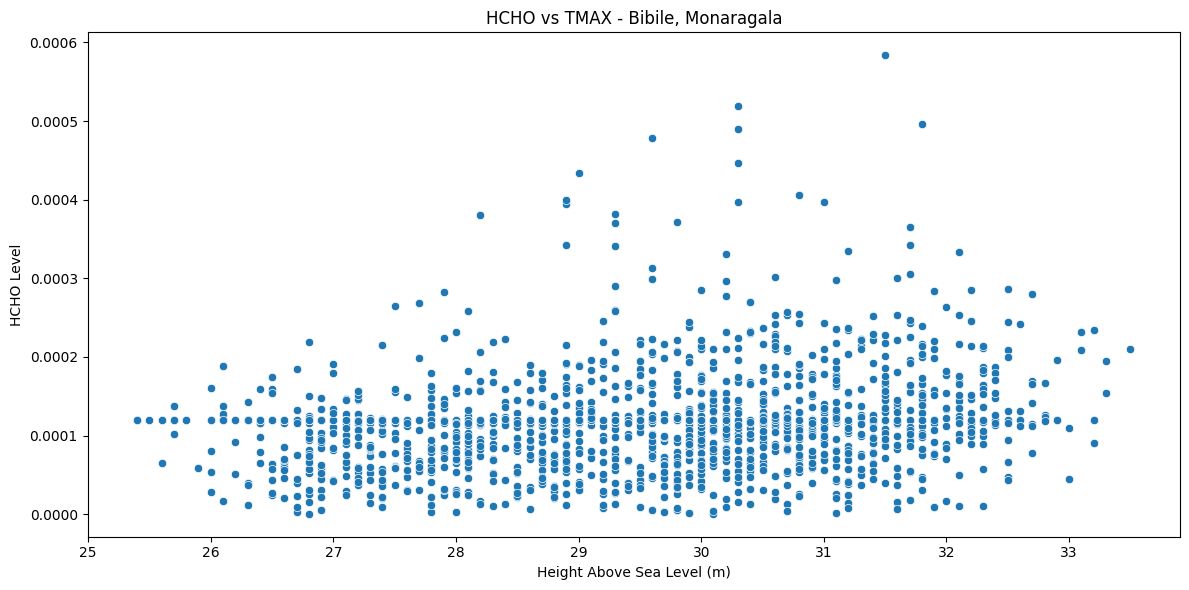

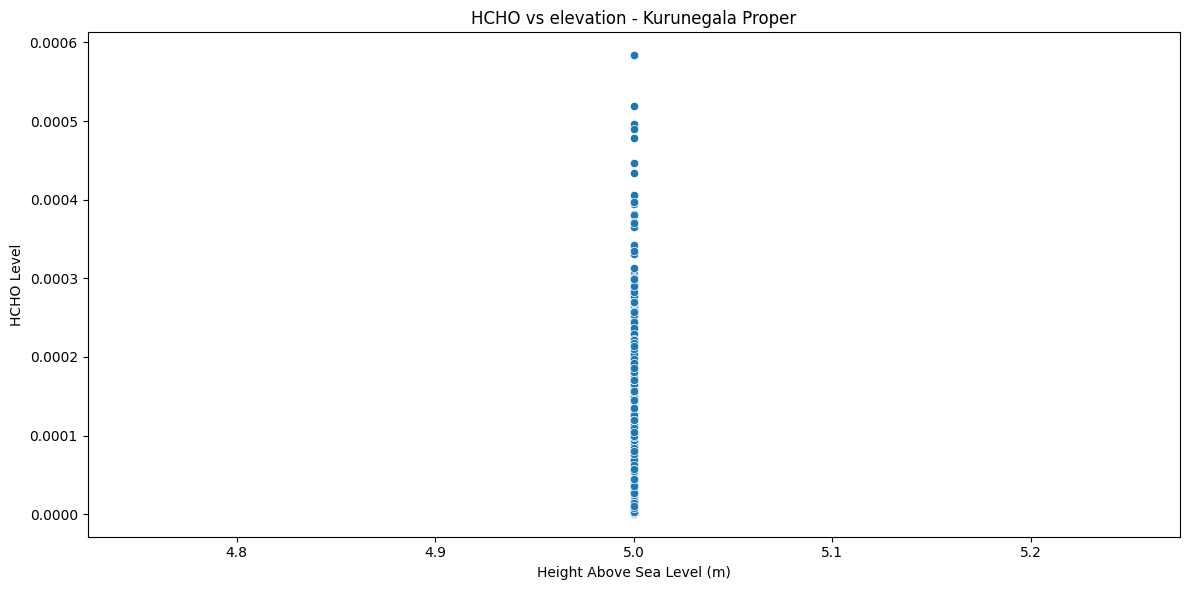

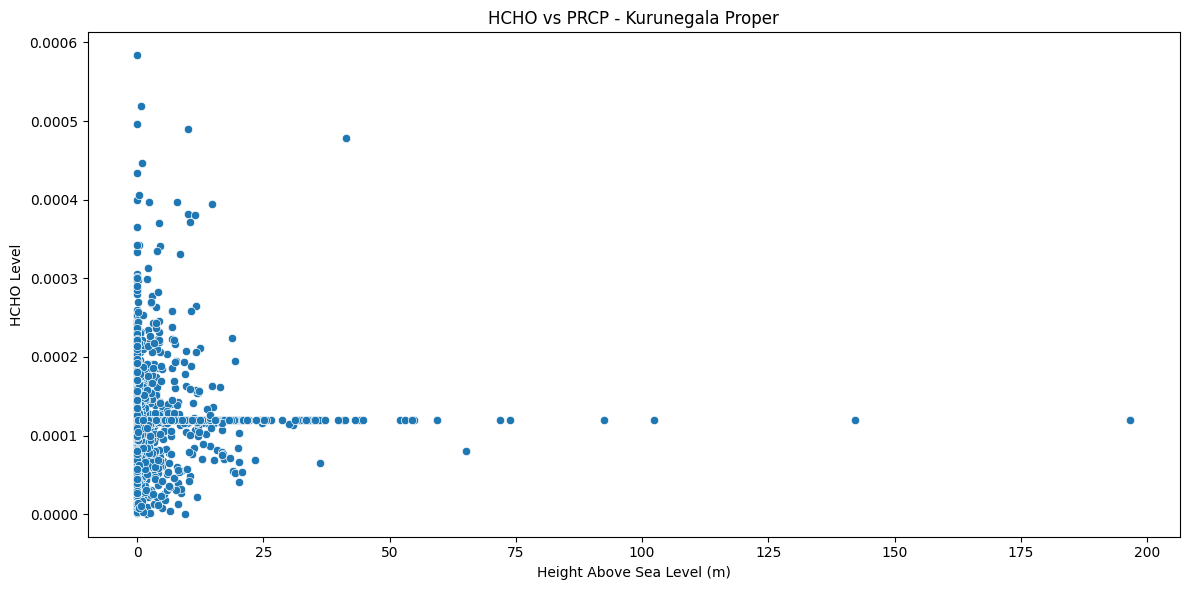

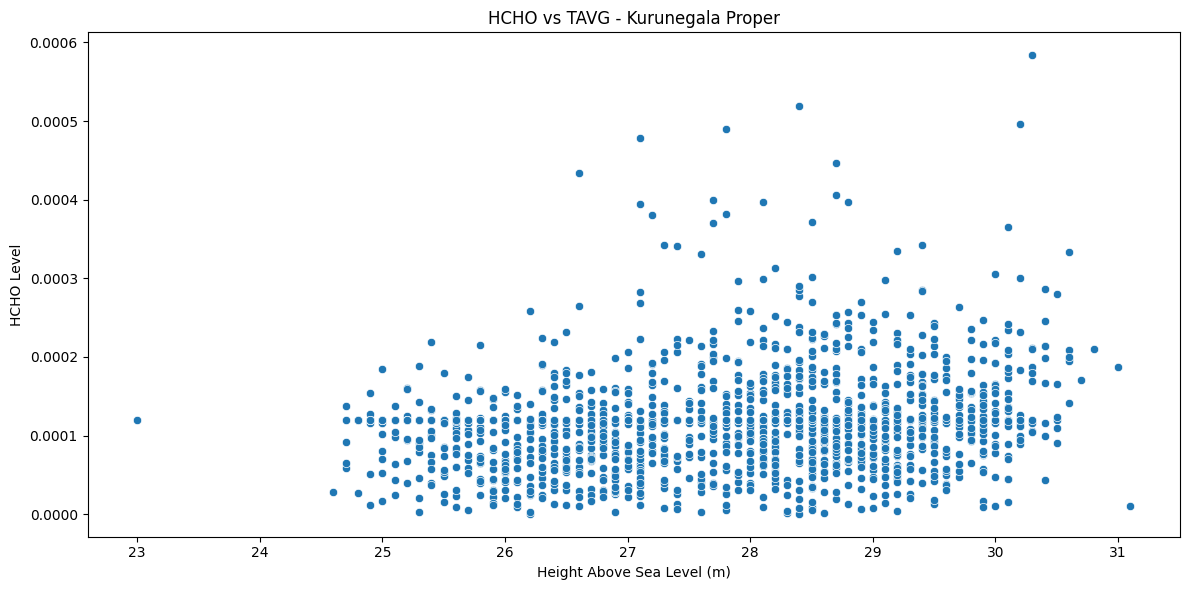

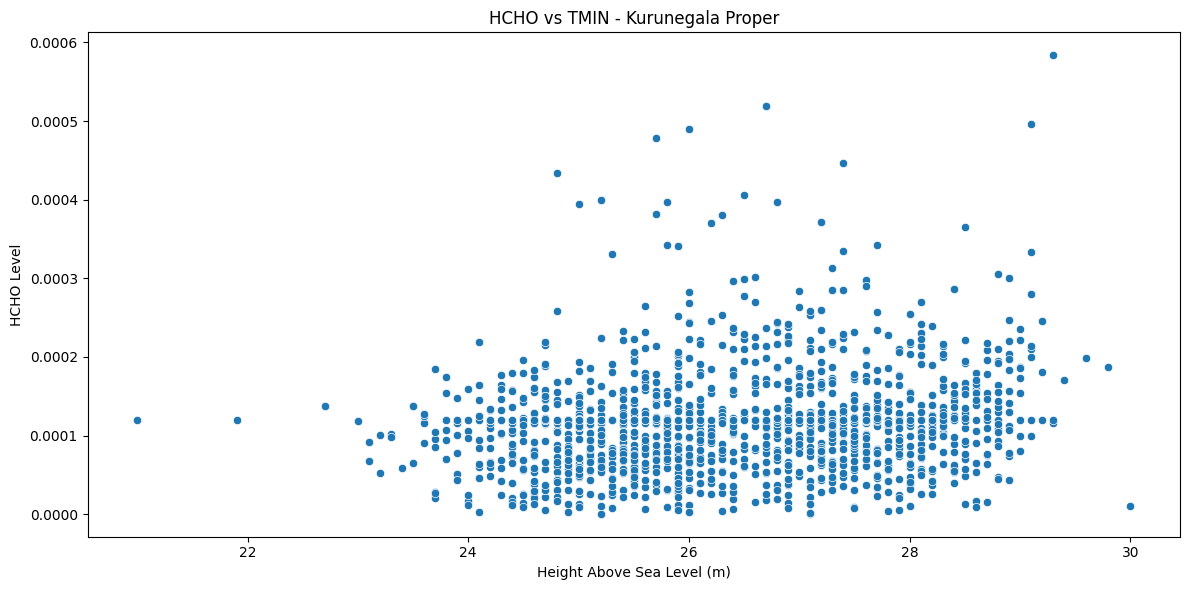

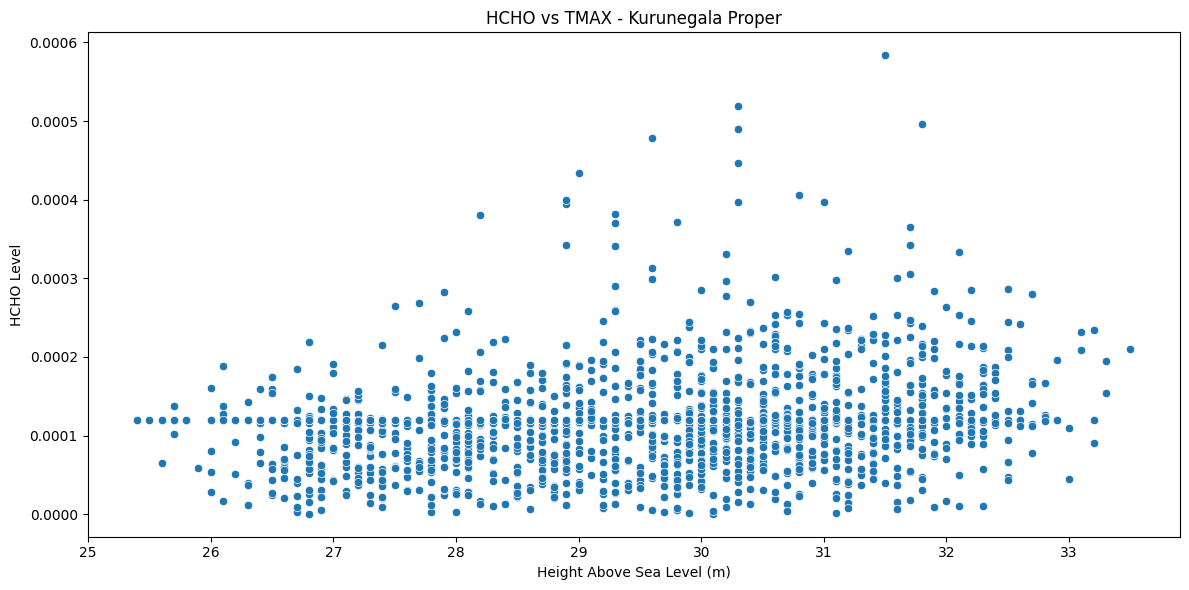

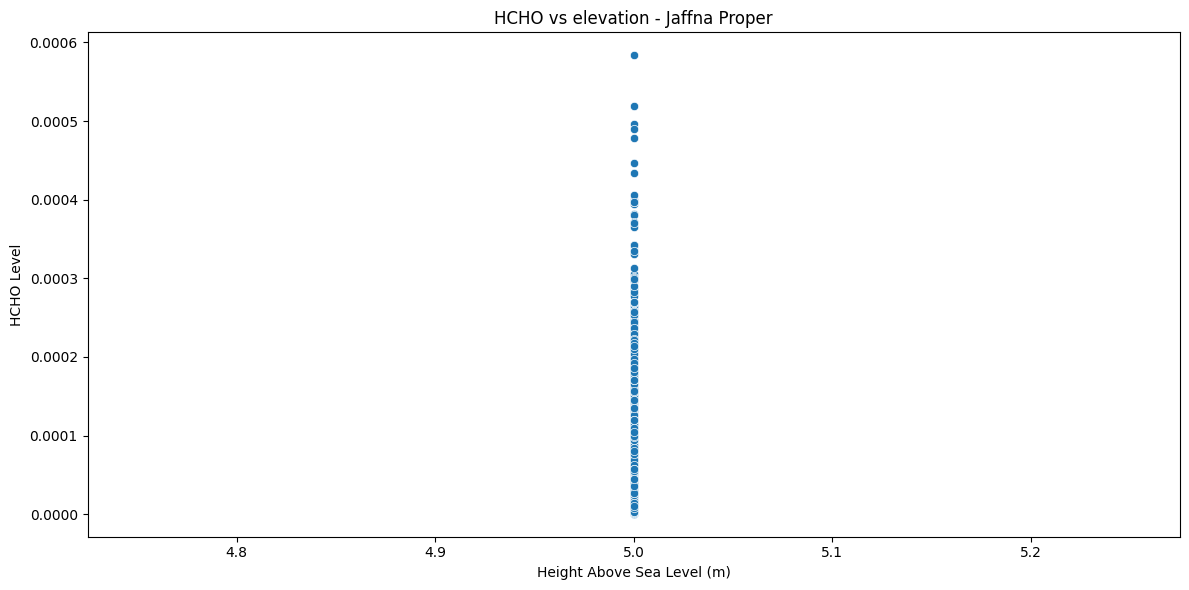

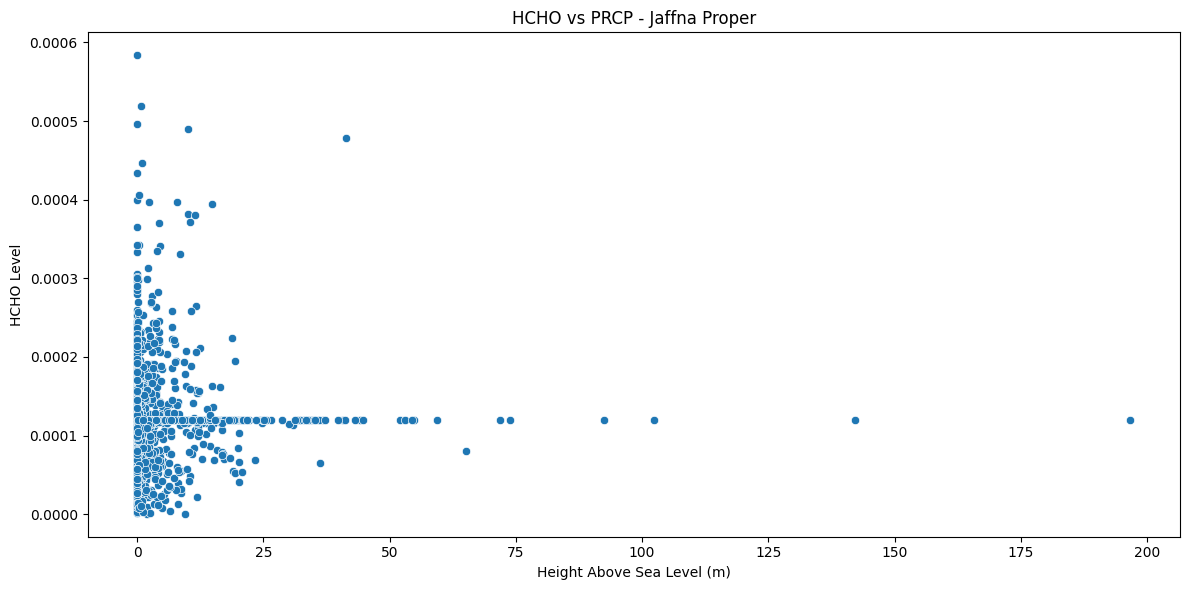

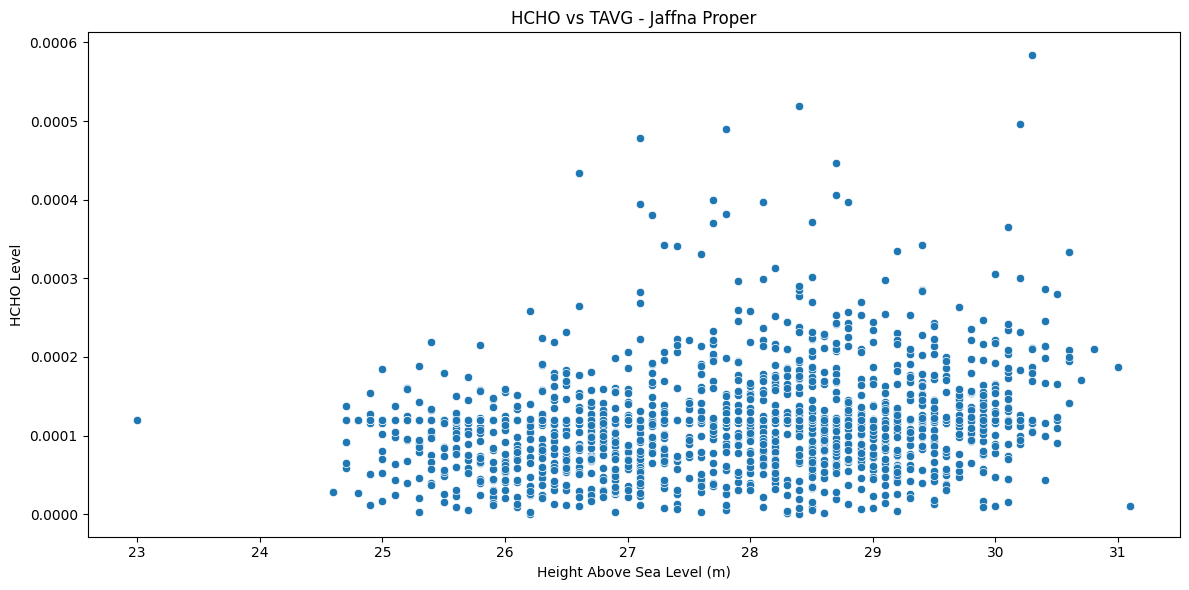

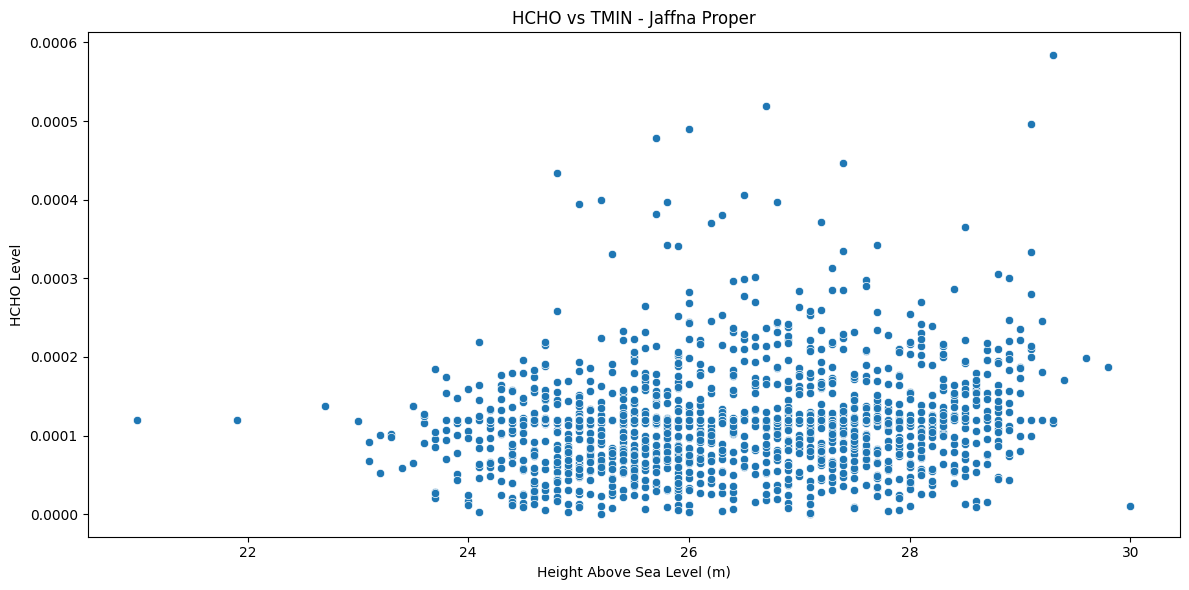

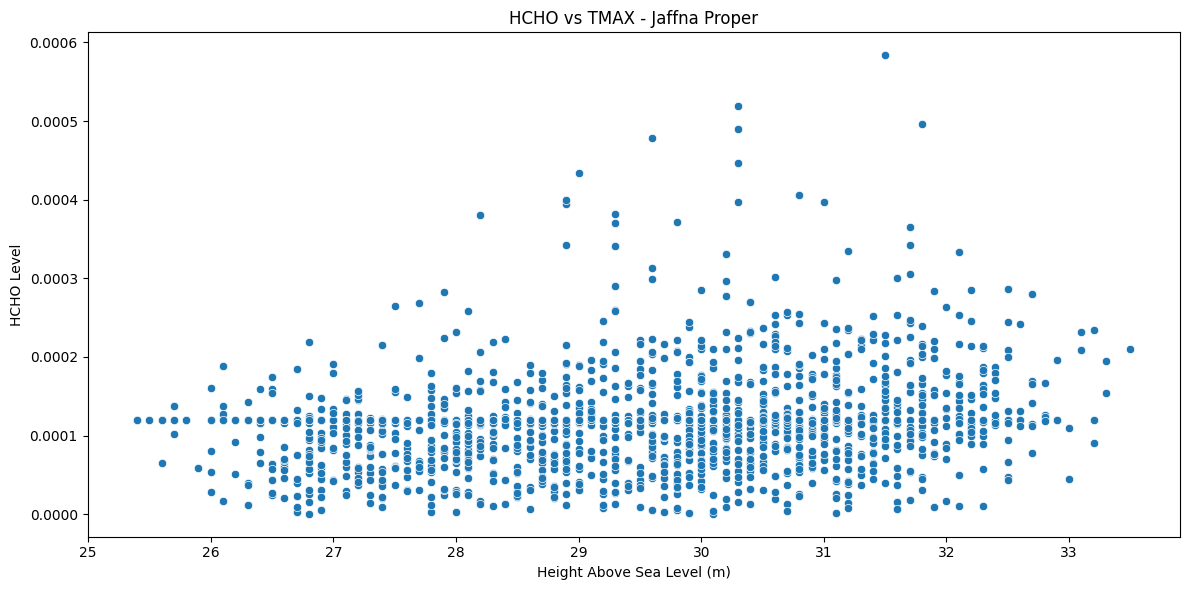

In [90]:
# Compare spatial patterns: potential contributing factors against height above sea level(elevation)

lst = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper']
factors = ['elevation','PRCP', 'TAVG', 'TMIN', 'TMAX']


for location in lst:
    # specific location
    specific_location = final_df[final_df['location'] == location]
    
    for factor in factors:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=specific_location, x=factor, y='hcho-reading')
        plt.title(f'HCHO vs {factor} - {location}')
        plt.xlabel('Height Above Sea Level (m)')
        plt.ylabel('HCHO Level')
        plt.tight_layout()
        plt.show()

In [94]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# split data into train and test
train_size = int(len(final_df) * 0.8)
train_data = final_df[:train_size]['hcho-reading']
test_data = final_df[train_size:]['hcho-reading']

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Forecast HCHO levels for the test set
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model's performance
mse = mean_squared_error(test_data, forecast)
rmse = sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Plot actual vs. predicted HCHO levels
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecasting: Actual vs. Predicted HCHO Levels')
plt.xlabel('Date')
plt.ylabel('HCHO Level (mol/m²)')
plt.legend()
plt.show()
